WhatsApp Image 2025-04-10 at 3.09.01 PM (1).jpeg

---
  ## **a) Integrantes del equipo**:🎓​
  ---


| Integrantes   | No. de cuenta    |
|----------|------|
| Bohórquez Nuño Ana Elizabeth        | 422101862     |
| Cervantes Vasconcelos María Fernanda| 318711827    |
| Hernandez Vargas Hector | 422020053|
| Lugo Salazar María Inés     | 422088480 |
|Morales Ramirez Angel Francisco |422093653|
| Tienda Tienda Sebastian | 319035090 |
|Zuñiga Galván Diego Antonio | 422106104 |

---
# **Indicaciones**:👨‍🏫
---


############################
## SEGUNDA TAREA EN EQUIPO ###
############################

Para esta su segunda tarea en equipo deberán realizar el análisis exploratorio de su set de datos así como la ejecución de un modelo de regresión lineal, previamente deberán describir su modelo es decir explicar su variable objetivo y porque creen que su modelo tiene sustento metodológico así como el análisis exploratorio de las variables presentes en el dataset.

Nota: deberán seleccionar un data set que les sirva para realizar un modelo de regresión lineal, el dataset lo pueden sacar de Kaggle o de la Univeridad de California, les recomiendo poner en su buscador “linear regression dataset”, no usen datasets que digan modelos de clasificación o tengan respuesta Target binaria 0,1. O bien datasets referentes a modelos de clustering. O bien modelos que su interior contemplen fechas o series de tiempo.

Su Colab deberá contener lo siguiente:

a. Encabezado con el nombre de los integrantes

b. Descripción del set de datos

c. Definición de la variable objetivo (variable Y)

d. Definición no tan exhaustiva de los features del set de datos (variables X) con al menos 5 regresores.

e. Análisis exploratorio de los datos donde se revise la relación entre features y la relación con la variable objetivo (tablas, gráficas con formatos diferentes a los presentados por default en Python)

f. Tabla de resultados del modelo construido con la interpretación de los resultados de la regresión así como de los elementos de la tabla de summary()

g. Realizar una revisión profunda de si su modelo cumple con los supuestos de la regresión vistos en clase

h. Generar algunas Hipótesis del porque el set de datos pudiera requerir de un tratamiento posterior para cumplir con los supuestos de la regresión

El documento se entrega en google Colab, el archivo y los datos deberán estar compartidos, les recomiendo hagan pruebas antes de compartirme su Colab.

El Colab lo deberán compartir en este canal y ustedes serán los responsables por la seguridad de su documento.

Para los que decidan usar R dentro de Colab deberán describir cada función de regresión que requieran utilizar, mismo caso si no utilizan las librerías de sklearn o statmodels de Python.

Los criterios de evaluación son:

a. Originalidad en la presentación del dataset

b. Dominio en el conocimiento del dataset

c. Originalidad en la presentación de resultados (formatos de las tablas y gráficas)

d. Profundidad en las Hipótesis planteadas

e. Grado de dominio de los conceptos de regresión lineal

Los resultados en su Colab deben ser diferentes a los mostrados por el profesor en clase para obtener una calificación sobresaliente.

El tiempo para entregar esta su segunda tarea será el domingo 11 de Abril del presente.

---
#**b) Descripción del set de datos**:📋
---

Para la prepación de los datos realizamos una inspección que nos permita verificar si hay valores nulos e incluso valores repetidos, así mismo agregamos el diccionario de nuestras variables para que sea más sencillo desarrollar hipotesis de la relación de nuestras variables.

In [ ]:
#Importamos las librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
%config InlineBackend.figure_format = 'retina'


In [ ]:
#Ponemos la dirrección del repositorio con los datos
url_datos=('https://raw.githubusercontent.com/FranciscoMoralesActuary/Precios-Casas/main/Housing.csv')
#Leemos el archivo con la función de Pandas pd.read
df = pd.read_csv(url_datos)

In [ ]:
#Mostramos los datos
df.head()

price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0  13300000  7420         4          2        3      yes        no       no   
1  12250000  8960         4          4        4      yes        no       no   
2  12250000  9960         3          2        2      yes        no      yes   
3  12215000  7500         4          2        2      yes        no      yes   
4  11410000  7420         4          1        2      yes       yes      yes   

  hotwaterheating airconditioning  parking prefarea furnishingstatus  
0              no             yes        2      yes        furnished  
1              no             yes        3       no        furnished  
2              no              no        2      yes   semi-furnished  
3              no             yes        3      yes        furnished  
4              no             yes        2       no        furnished

###Diccionario de Variables

Agregamos una breve descripción de nuestro dataset así, como los posibles valores que toman nuestras variables:

| Variable            | Tipo        | Descripción                                                                 |
|---------------------|-------------|------------------------------------------------------------------------------|
| `price`             | Numérica    | Precio de la propiedad (en moneda local).           |
| `area`              | Numérica    | Área construida del inmueble (en la medida convencional ya sea pies cuadrados o metros cuadrados).        |
| `bedrooms`          | Numérica    | Número de recámaras.                                                        |
| `bathrooms`         | Numérica    | Número de baños.                                                            |
| `stories`           | Numérica    | Número de pisos o niveles de la casa.                                       |
| `mainroad`          | Categórica  | Si la casa está ubicada en una calle principal (`yes` / `no`).             |
| `guestroom`         | Categórica  | Si la casa tiene cuarto de visitas (`yes` / `no`).                          |
| `basement`          | Categórica  | Si la casa cuenta con sótano (`yes` / `no`).                                |
| `hotwaterheating`   | Categórica  | Si la casa tiene calefacción de agua (`yes` / `no`).                        |
| `airconditioning`   | Categórica  | Si la casa cuenta con aire acondicionado (`yes` / `no`).                    |
| `parking`           | Numérica    | Número de espacios de estacionamiento.                                      |
| `prefarea`          | Categórica  | Si está en una zona residencial preferente (`yes` / `no`).                  |
| `furnishingstatus`  | Categórica  | Nivel de amueblado (`furnished`, `semi-furnished`, `unfurnished`).         |




In [ ]:
#Verificamos las dimensiones de los datos
df.shape

(545, 13)

In [ ]:
#Observamos la cantidad de registros nulos que hay en el DataFrame
df.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [ ]:
#El siguiente gráfico nos permite visualizar la cantidad de valores nulos que hay en nuestro dataset
# facecolor--> color  de fondo
plt.figure(figsize=(14,6), facecolor='black')
#Tipo de letra para el gráfico
plt.rcParams['font.family'] = 'DejaVu Serif'
#Grafico para ver la proporción de valores nulos
sns.heatmap(df.isnull(), cmap='Purples')

# Agregamos el título
#fontweight='bold'-->Negritas
plt.title('Gráfico de Valores nulos',
          fontsize=16, color='cyan', fontweight='bold')
#Agregamos las etiquetas de los valores del eje X
plt.xticks(fontsize=12, color='ghostwhite',rotation=45, ha='right')
plt.yticks(fontsize=10, color='lime')

#Mostramos el gráfico
plt.tight_layout()
plt.show()

In [ ]:
#Calculamos algunas de las estadísticas descriptivas de nuestras variables numéricas
df.describe()

price          area    bedrooms   bathrooms     stories  \
count  5.450000e+02    545.000000  545.000000  545.000000  545.000000   
mean   4.766729e+06   5150.541284    2.965138    1.286239    1.805505   
std    1.870440e+06   2170.141023    0.738064    0.502470    0.867492   
min    1.750000e+06   1650.000000    1.000000    1.000000    1.000000   
25%    3.430000e+06   3600.000000    2.000000    1.000000    1.000000   
50%    4.340000e+06   4600.000000    3.000000    1.000000    2.000000   
75%    5.740000e+06   6360.000000    3.000000    2.000000    2.000000   
max    1.330000e+07  16200.000000    6.000000    4.000000    4.000000   

          parking  
count  545.000000  
mean     0.693578  
std      0.861586  
min      0.000000  
25%      0.000000  
50%      0.000000  
75%      1.000000  
max      3.000000

In [ ]:
#Mostramos la información de las columas de los datos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [ ]:
#Eliminamos los valores duplicados
df.drop_duplicates(inplace = True)

In [ ]:
#Mostramos la descripción de los datos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


Como se puede observar no tenemos ningún dato duplicado, ni tampoco datos nulos, lo que nos permitira continuar la regresión.

---
#**c) Definición de la variable objetivo (variable Y)**🏘️:
---

###Justificación de la Variable Objetivo

En este análisis se ha seleccionado la variable **price** como variable objetivo del modelo de regresión. Esta elección se fundamenta en el hecho de que el precio de una propiedad es una variable continua y cuantificable, que resulta directamente afectada por múltiples características del inmueble, tales como el área construida, el número de recámaras y baños, la presencia de sótano, aire acondicionado, nivel de amueblado, entre otras que son algunas de las variables que tenemos en el dataset.

De lo anterior, se parte de la hipótesis de que existe una relación significativa entre las características de las propiedades y su precio de mercado, lo que justifica el uso de técnicas de regresión para modelar dicha dependencia y realizar predicciones precisas sobre el precio nuevos inmuebles.

La variable objetivo es $y=$ Precio de la casa $(\$)$

In [ ]:
#Definición de la variable a predecir, y:=precio de la casa
y = df['price']
#Mostramos la variable y
y

0      13300000
1      12250000
2      12250000
3      12215000
4      11410000
         ...   
540     1820000
541     1767150
542     1750000
543     1750000
544     1750000
Name: price, Length: 545, dtype: int64

---
#**d) Definición no tan exhaustiva de los features del set de datos (variables X) con al menos 5 regresores.** 🔢🏠
---

**Variables X**

$X_1$= 'area' (Área de la casa)

$X_2$= 'bathrooms' (Número de baños en la casa)

$X_3$= 'stories' (Número de pisos en la casa)

$X_4$= 'mainroad' (Valor booleano que indica si la casa tiene acceso a una carretera principal)

$X_5$= 'basement' (Valor booleano que indica si la casa tiene sótano)

$X_6$= 'hotwaterheating' (Valor booleano que indica si la casa tiene calefacción por agua caliente)

$X_7$= 'airconditioning' (Valor booleano que indica si la casa tiene aire acondicinado)

$X_8$= 'parking' (Valor booleano que indica para cuantas autos tiene capacidad el estacionamiento de la casa)

$X_9$= 'prefarea' (Valor booleano que indica se encuentra en una zona preferente)

In [ ]:
#Variables X
X = df[['area', 'bathrooms', 'stories', 'mainroad',
       'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea']]
#Mostramos la variables X
X

area  bathrooms  stories mainroad basement hotwaterheating  \
0    7420          2        3      yes       no              no   
1    8960          4        4      yes       no              no   
2    9960          2        2      yes      yes              no   
3    7500          2        2      yes      yes              no   
4    7420          1        2      yes      yes              no   
..    ...        ...      ...      ...      ...             ...   
540  3000          1        1      yes      yes              no   
541  2400          1        1       no       no              no   
542  3620          1        1      yes       no              no   
543  2910          1        1       no       no              no   
544  3850          1        2      yes       no              no   

    airconditioning  parking prefarea  
0               yes        2      yes  
1               yes        3       no  
2                no        2      yes  
3               yes        3      yes  
4               yes        2       no  
..              ...      ...      ...  
540              no        2       no  
541              no        0       no  
542              no        0       no  
543              no        0       no  
544              no        0       no  

[545 rows x 9 columns]

---
#**e) Análisis exploratorio de los datos donde se revise la relación entre features y la relación con la variable objetivo (tablas, gráficas con formatos diferentes a los presentados por default en Python)**🛠️
---

En esta sección se realiza un análisis exploratorio para identificar patrones, relaciones y posibles correlaciones entre las variables predictoras (`features`) y la variable objetivo **price**. Se emplean distintas visualizaciones personalizadas como diagramas de frecuencias, diagramas de dispersión segmentados y boxplots, con el fin de facilitar la interpretación visual de la influencia que cada característica puede tener sobre el precio de las propiedades. Este análisis preliminar es clave para comprender mejor la estructura de los datos y guiar la selección de variables relevantes para el modelo de regresión.


In [ ]:
# Creamos la figura y ajustar el tamaño
plt.figure(figsize=(20,10))
#Tipo de letra para el gráfico
plt.rcParams['font.family'] = 'DejaVu Serif'
#Color  de fondo negro
plt.style.use("dark_background")
#Gráfico sobre la distribución del precio
grafica=sns.displot(df["price"], bins = 20, kde = True,
                    color='pink',linewidth=2,linestyle='dashed'
                    )
plt.title("Distribución de precios de casas",fontsize=16,
          color='cyan',fontweight='bold'
          )
#Agregamos las etiquetas de los valores del eje X
plt.xticks(fontsize=12, color='lime')
plt.yticks(fontsize=12, color='lime')
#Etiquetas del gráfico
plt.xlabel("Precio",fontsize=12,color='yellow')
plt.ylabel("Frecuencia",fontsize=12,color='fuchsia')
#Mostramos el gráfico
plt.show()

<Figure size 2000x1000 with 0 Axes>

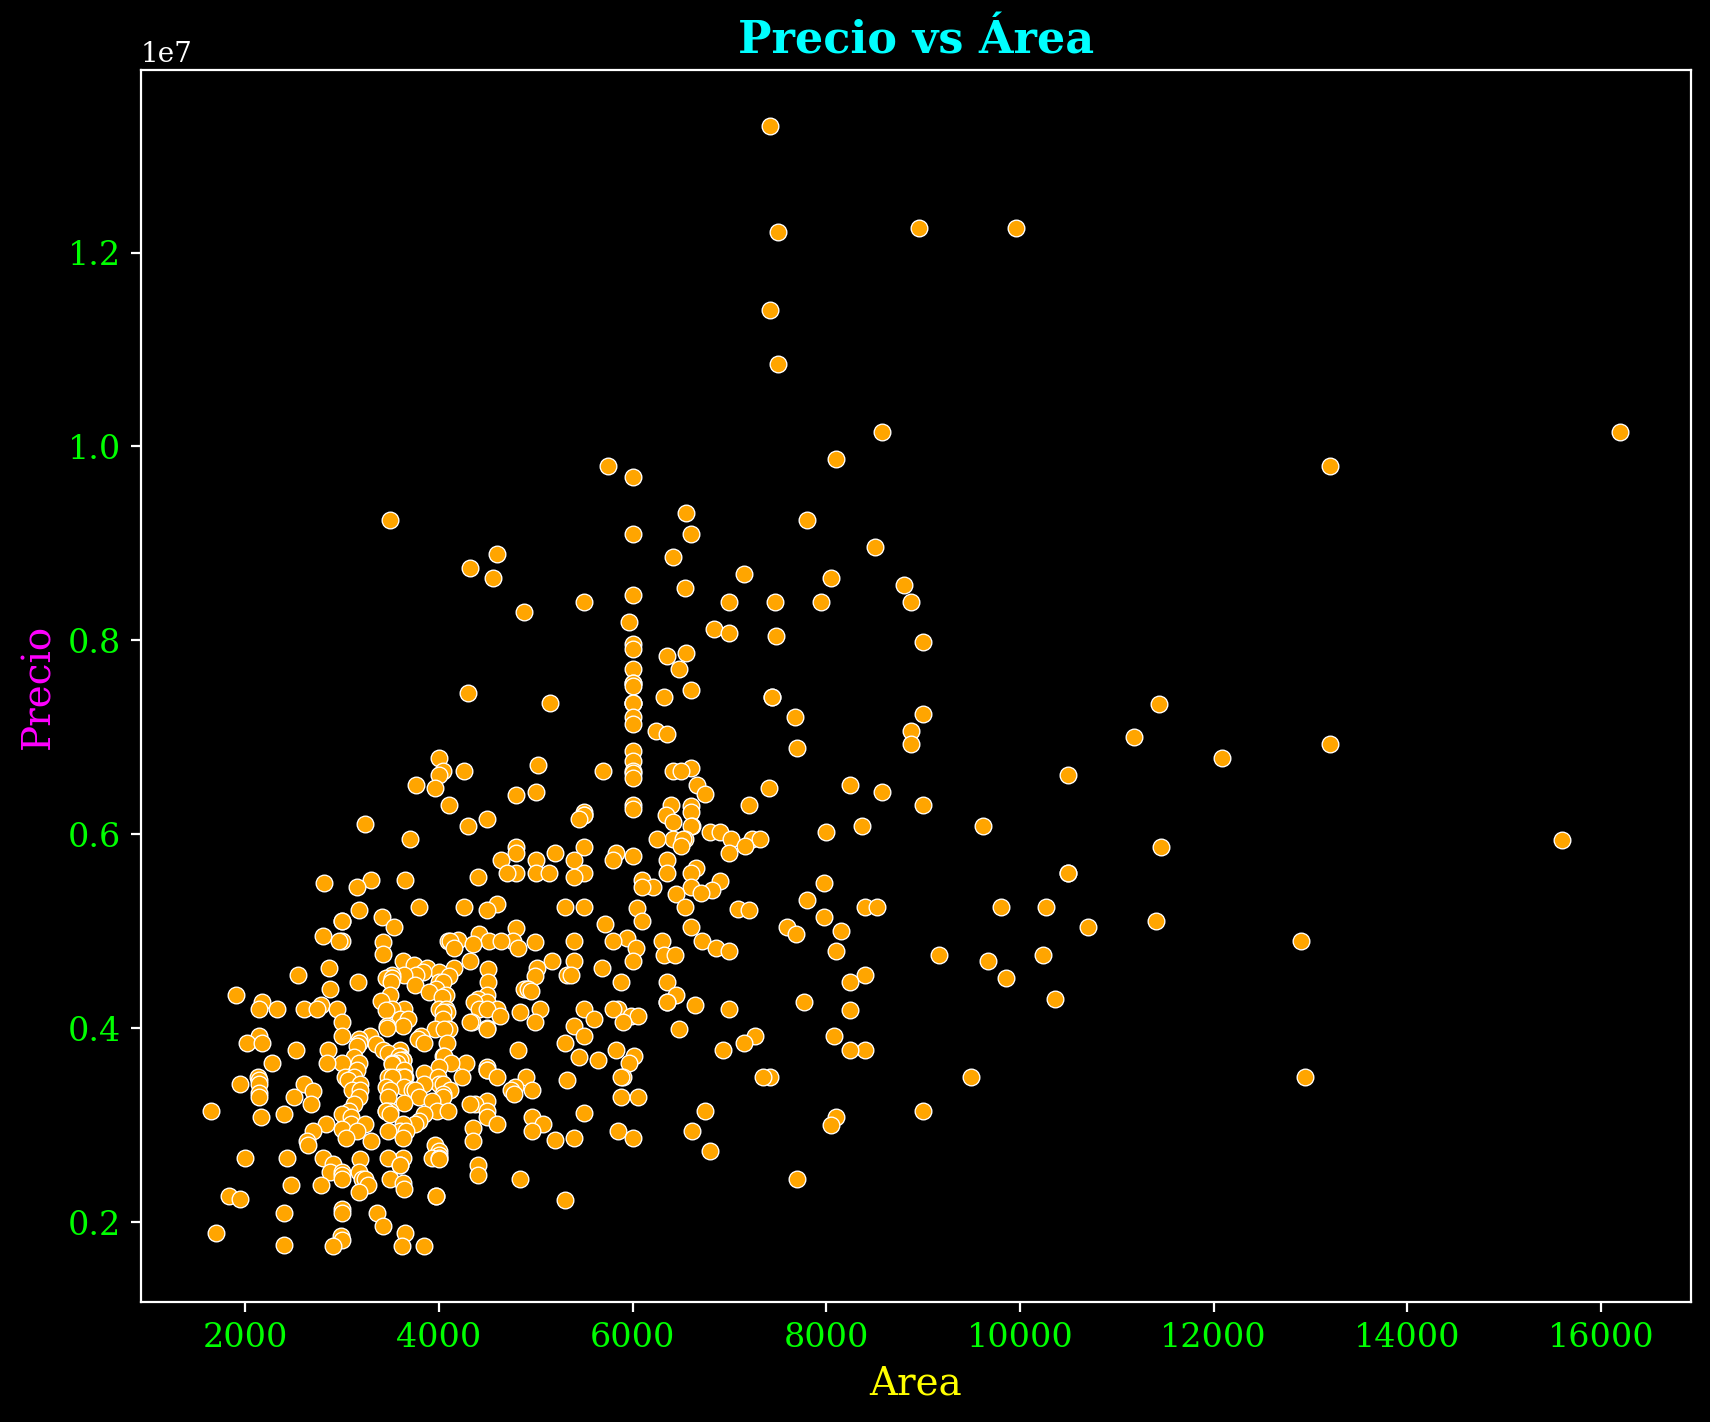

In [ ]:
# Creamos la figura y ajustar el tamaño
plt.figure(figsize=(10,8))
#Tipo de letra para el gráfico
plt.rcParams['font.family'] = 'DejaVu Serif'
#Color  de fondo negro
plt.style.use("dark_background")
#Creación del gráfico
sns.scatterplot(x = "area", y = "price", data = df, color = "orange")

#Título del gráfico
plt.title("Precio vs Área",fontsize=16,
          color='cyan',fontweight='bold')
#Agregamos las etiquetas de los valores del eje X
plt.xticks(fontsize=12, color='lime')
plt.yticks(fontsize=12, color='lime')
#Etiquetas del gráfico
plt.xlabel("Area",fontsize=14,color='yellow')
plt.ylabel("Precio",fontsize=14,color='fuchsia')
#Mostramos el gráfico
plt.show()

In [ ]:
# Creamos la figura y ajustar el tamaño
plt.figure(figsize=(10,8))
#Tipo de letra para el gráfico
plt.rcParams['font.family'] = 'DejaVu Serif'
#Color  de fondo negro
plt.style.use("dark_background")
#Creacion del gráfico
sns.boxplot(x = "mainroad", y = "price", data = df, showmeans=True, width=0.5,
#Colores dela caja
            boxprops=dict(facecolor='khaki', edgecolor='cyan'),
#Lineas verticales
            whiskerprops=dict(color='gold',linewidth=1,linestyle='dashdot'),
#Lineas horizontales
            capprops=dict(color='magenta',linewidth=1,linestyle='solid'),
#Valores atípicos
            flierprops=dict(marker='*', markersize=7,markerfacecolor='lime',
                            markeredgecolor='forestgreen'),
#Mostrar la mediana
            medianprops=dict(color='aliceblue', linewidth=1.5,linestyle="dashed"),
#Mostrar la media
            meanprops=dict(marker='D', markersize=6,
                           markerfacecolor='skyblue', markeredgecolor='navy')

            )
#Título del gráfico
plt.title("Precio vs Mainroad",fontsize=16,
          color='cyan',fontweight='bold')
#Agregamos las etiquetas de los valores del eje X
plt.xticks(fontsize=12, color='lime')
plt.yticks(fontsize=12, color='lime')
#Etiquetas del gráfico
plt.xlabel("Mainroad",fontsize=14,color='yellow')
plt.ylabel("Precio",fontsize=14,color='fuchsia')
#Mostramos el gráfico
plt.show()

In [ ]:
# Creamos la figura y ajustar el tamaño
plt.figure(figsize=(10,8))
#Tipo de letra para el gráfico
plt.rcParams['font.family'] = 'DejaVu Serif'
#Color  de fondo negro
plt.style.use("dark_background")
#Creacion del gráfico
sns.boxplot(x = "basement", y = "price", data = df, showmeans=True, width=0.5,
#Colores dela caja
            boxprops=dict(facecolor='khaki', edgecolor='cyan'),
#Lineas verticales
            whiskerprops=dict(color='gold',linewidth=1,linestyle='dashdot'),
#Lineas horizontales
            capprops=dict(color='magenta',linewidth=1,linestyle='solid'),
#Valores atípicos
            flierprops=dict(marker='*', markersize=7,markerfacecolor='lime',
                            markeredgecolor='forestgreen'),
#Mostrar la mediana
            medianprops=dict(color='aliceblue', linewidth=1.5,linestyle="dashed"),
#Mostrar la media
            meanprops=dict(marker='D', markersize=6,
                           markerfacecolor='skyblue', markeredgecolor='navy')

            )
#Título del gráfico
plt.title("Precio vs Basement",fontsize=16,
          color='cyan',fontweight='bold')
#Etiquetas del gráfico
plt.xlabel("Basement",fontsize=14,color='yellow')
plt.ylabel("Precio",fontsize=14,color='fuchsia')
#Agregamos las etiquetas de los valores del eje X
plt.xticks(fontsize=12, color='lime')
plt.yticks(fontsize=12, color='lime')
#Mostramos el gráfico
plt.show()

## Outliners🚨

Un **valor atípico (outliner)** es un valor de datos que se desvía significativamente del resto de los valores, es decir, una observación con un valor mucho más grande o pequeño que el resto de los valores en el conjunto de datos

Los outliners influyen a que los modelos de regresión no generalicen bien y tengan conclusiones erróneas por eso deben de ser tratados en el conjunto de datos

**¿Cómo identificar outliners?**

1. **Visualización de datos** Se grafica el diagrama de caja de la variable a analizar y en qué caso de existen valores atípicos muy grandes se visualizaran de manera clara como puntos fuera del rango
2.   **Rango IQR** También conocido como rango intercuartílico se trata toman $Q_1$ (Percentil $0.25$) y $Q_3$ (Percentil $0.75$)  y todo valor fuera del intervalo $[Q_1-1.5*IQR,Q_3+1.5*IQR]$ se considera outliner
1.   **Z-Score** Mide las desviaciones estándar de un punto respecto a la media y considera outliners a aquellos que tienen un valor de $|Z|>3$

In [ ]:
# Creamos la figura y ajustar el tamaño
plt.figure(figsize=(10,8))
#Tipo de letra para el gráfico
plt.rcParams['font.family'] = 'DejaVu Serif'
#Color  de fondo negro
plt.style.use("dark_background")
#Creacion del gráfico
sns.boxplot(x = "price", data = df, showmeans=True, width=0.5,
#Colores dela caja
            boxprops=dict(facecolor='khaki', edgecolor='cyan'),
#Lineas verticales
            whiskerprops=dict(color='gold',linewidth=1,linestyle='dashdot'),
#Lineas horizontales
            capprops=dict(color='magenta',linewidth=1,linestyle='solid'),
#Valores atípicos
            flierprops=dict(marker='*', markersize=7,markerfacecolor='lime',
                            markeredgecolor='forestgreen'),
#Mostrar la mediana
            medianprops=dict(color='aliceblue', linewidth=1.5,linestyle="dashed"),
#Mostrar la media
            meanprops=dict(marker='D', markersize=6,
                           markerfacecolor='skyblue', markeredgecolor='navy')

            )
#Título del gráfico
plt.title("Outliners sobre los precios",fontsize=16,
          color='cyan',fontweight='bold')
#Etiquetas del gráfico
plt.xlabel("Precio",fontsize=14,color='yellow')
#Agregamos las etiquetas de los valores del eje X
plt.xticks(fontsize=12, color='lime')
plt.yticks(fontsize=12, color='lime')
#Mostramos el gráfico
plt.show()

In [ ]:
# Creamos la figura y ajustar el tamaño
plt.figure(figsize=(10,8))
#Tipo de letra para el gráfico
plt.rcParams['font.family'] = 'DejaVu Serif'
#Color  de fondo negro
plt.style.use("dark_background")
#Creacion del gráfico
sns.boxplot(x = "area", data = df, showmeans=True, width=0.5,
#Colores dela caja
            boxprops=dict(facecolor='khaki', edgecolor='cyan'),
#Lineas verticales
            whiskerprops=dict(color='gold',linewidth=1,linestyle='dashdot'),
#Lineas horizontales
            capprops=dict(color='magenta',linewidth=1,linestyle='solid'),
#Valores atípicos
            flierprops=dict(marker='*', markersize=7,markerfacecolor='lime',
                            markeredgecolor='forestgreen'),
#Mostrar la mediana
            medianprops=dict(color='aliceblue', linewidth=1.5,linestyle="dashed"),
#Mostrar la media
            meanprops=dict(marker='D', markersize=6,
                           markerfacecolor='skyblue', markeredgecolor='navy')

            )
#Título del gráfico
plt.title("Outliners sobre el area",fontsize=16,
          color='cyan',fontweight='bold')
#Etiquetas del gráfico
plt.xlabel("Area",fontsize=14,color='yellow')
#Agregamos las etiquetas de los valores del eje X
plt.xticks(fontsize=12, color='lime')
plt.yticks(fontsize=12, color='lime')
#Mostramos el gráfico
plt.show()

In [ ]:
#Eliminamos de Outliners para que no sesgen el modelo
#Nos quedamos con precios menores a $ 8,500,000
df= df[df['price']<=8500000]
#Nos quedamos con areas menores a 10,000
df= df[df['area']<=10000]

In [ ]:
# Creamos la figura y ajustar el tamaño
plt.figure(figsize=(10,8))
#Tipo de letra para el gráfico
plt.rcParams['font.family'] = 'DejaVu Serif'
#Color  de fondo negro
plt.style.use("dark_background")
#Creacion del gráfico
sns.boxplot(x = "price", data = df, showmeans=True, width=0.5,
#Colores dela caja
            boxprops=dict(facecolor='khaki', edgecolor='cyan'),
#Lineas verticales
            whiskerprops=dict(color='gold',linewidth=1,linestyle='dashdot'),
#Lineas horizontales
            capprops=dict(color='magenta',linewidth=1,linestyle='solid'),
#Valores atípicos
            flierprops=dict(marker='*', markersize=7,markerfacecolor='lime',
                            markeredgecolor='forestgreen'),
#Mostrar la mediana
            medianprops=dict(color='aliceblue', linewidth=1.5,linestyle="dashed"),
#Mostrar la media
            meanprops=dict(marker='D', markersize=6,
                           markerfacecolor='skyblue', markeredgecolor='navy')

            )
#Título del gráfico
plt.title("Diagrama de caja sobre los precios sin outliners",fontsize=16,
          color='cyan',fontweight='bold')
#Etiquetas del gráfico
plt.xlabel("Precio",fontsize=14,color='yellow')
#Agregamos las etiquetas de los valores del eje X
plt.xticks(fontsize=12, color='lime')
plt.yticks(fontsize=12, color='lime')
#Mostramos el gráfico
plt.show()

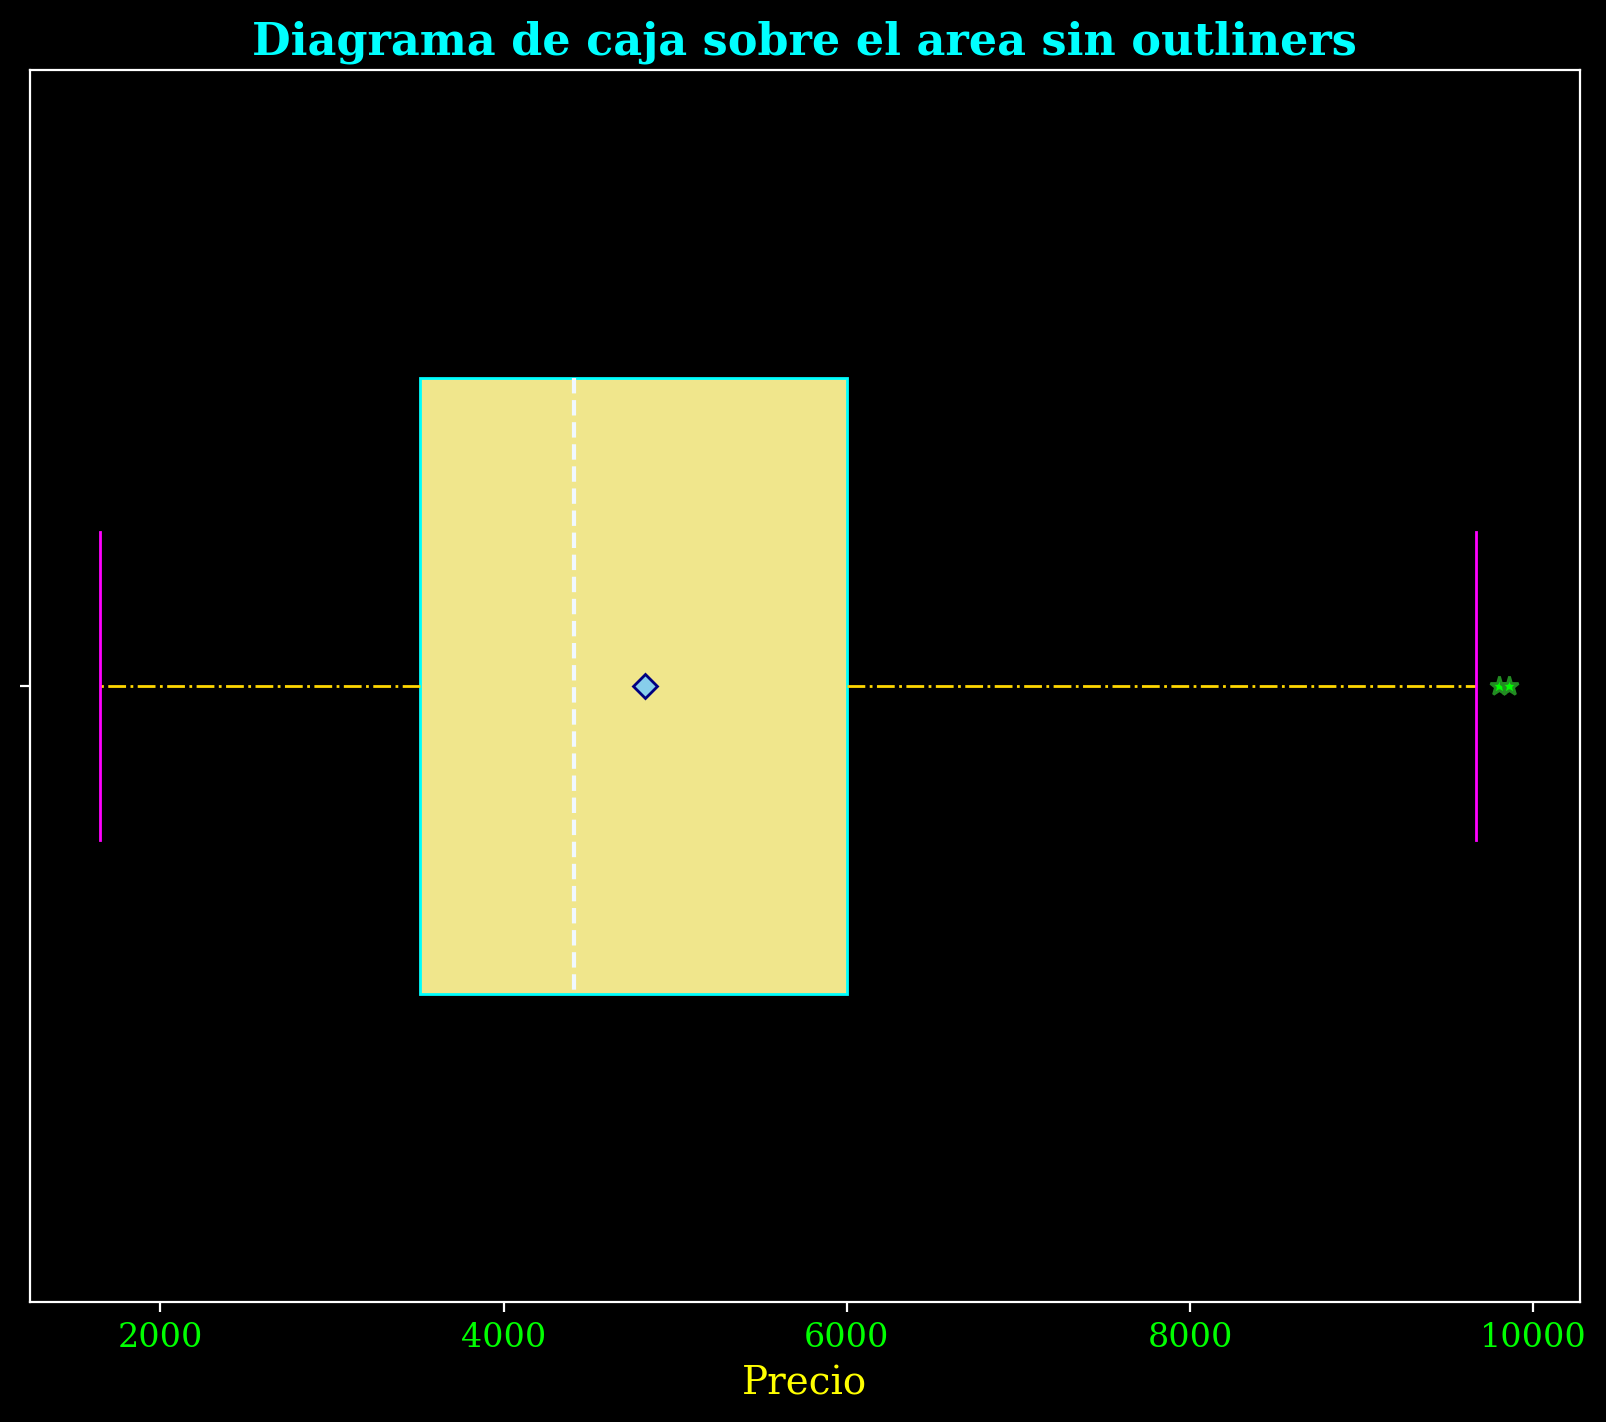

In [ ]:
# Creamos la figura y ajustar el tamaño
plt.figure(figsize=(10,8))
#Tipo de letra para el gráfico
plt.rcParams['font.family'] = 'DejaVu Serif'
#Color  de fondo negro
plt.style.use("dark_background")
#Creacion del gráfico
sns.boxplot(x = "area", data = df, showmeans=True, width=0.5,
#Colores dela caja
            boxprops=dict(facecolor='khaki', edgecolor='cyan'),
#Lineas verticales
            whiskerprops=dict(color='gold',linewidth=1,linestyle='dashdot'),
#Lineas horizontales
            capprops=dict(color='magenta',linewidth=1,linestyle='solid'),
#Valores atípicos
            flierprops=dict(marker='*', markersize=7,markerfacecolor='lime',
                            markeredgecolor='forestgreen'),
#Mostrar la mediana
            medianprops=dict(color='aliceblue', linewidth=1.5,linestyle="dashed"),
#Mostrar la media
            meanprops=dict(marker='D', markersize=6,
                           markerfacecolor='skyblue', markeredgecolor='navy')

            )
#Título del gráfico
plt.title("Diagrama de caja sobre el area sin outliners",fontsize=16,
          color='cyan',fontweight='bold')
#Etiquetas del gráfico
plt.xlabel("Precio",fontsize=14,color='yellow')
#Agregamos las etiquetas de los valores del eje X
plt.xticks(fontsize=12, color='lime')
plt.yticks(fontsize=12, color='lime')
#Mostramos el gráfico
plt.show()

In [ ]:
variables_dicotomicas = [i for i in df.columns if df[i].dtype == "object"]
variables_dicotomicas.remove("furnishingstatus")
variables_dicotomicas

['mainroad',
 'guestroom',
 'basement',
 'hotwaterheating',
 'airconditioning',
 'prefarea']

In [ ]:
variables_categoricas = ["bedrooms", "bathrooms", "stories", "parking", "furnishingstatus"]

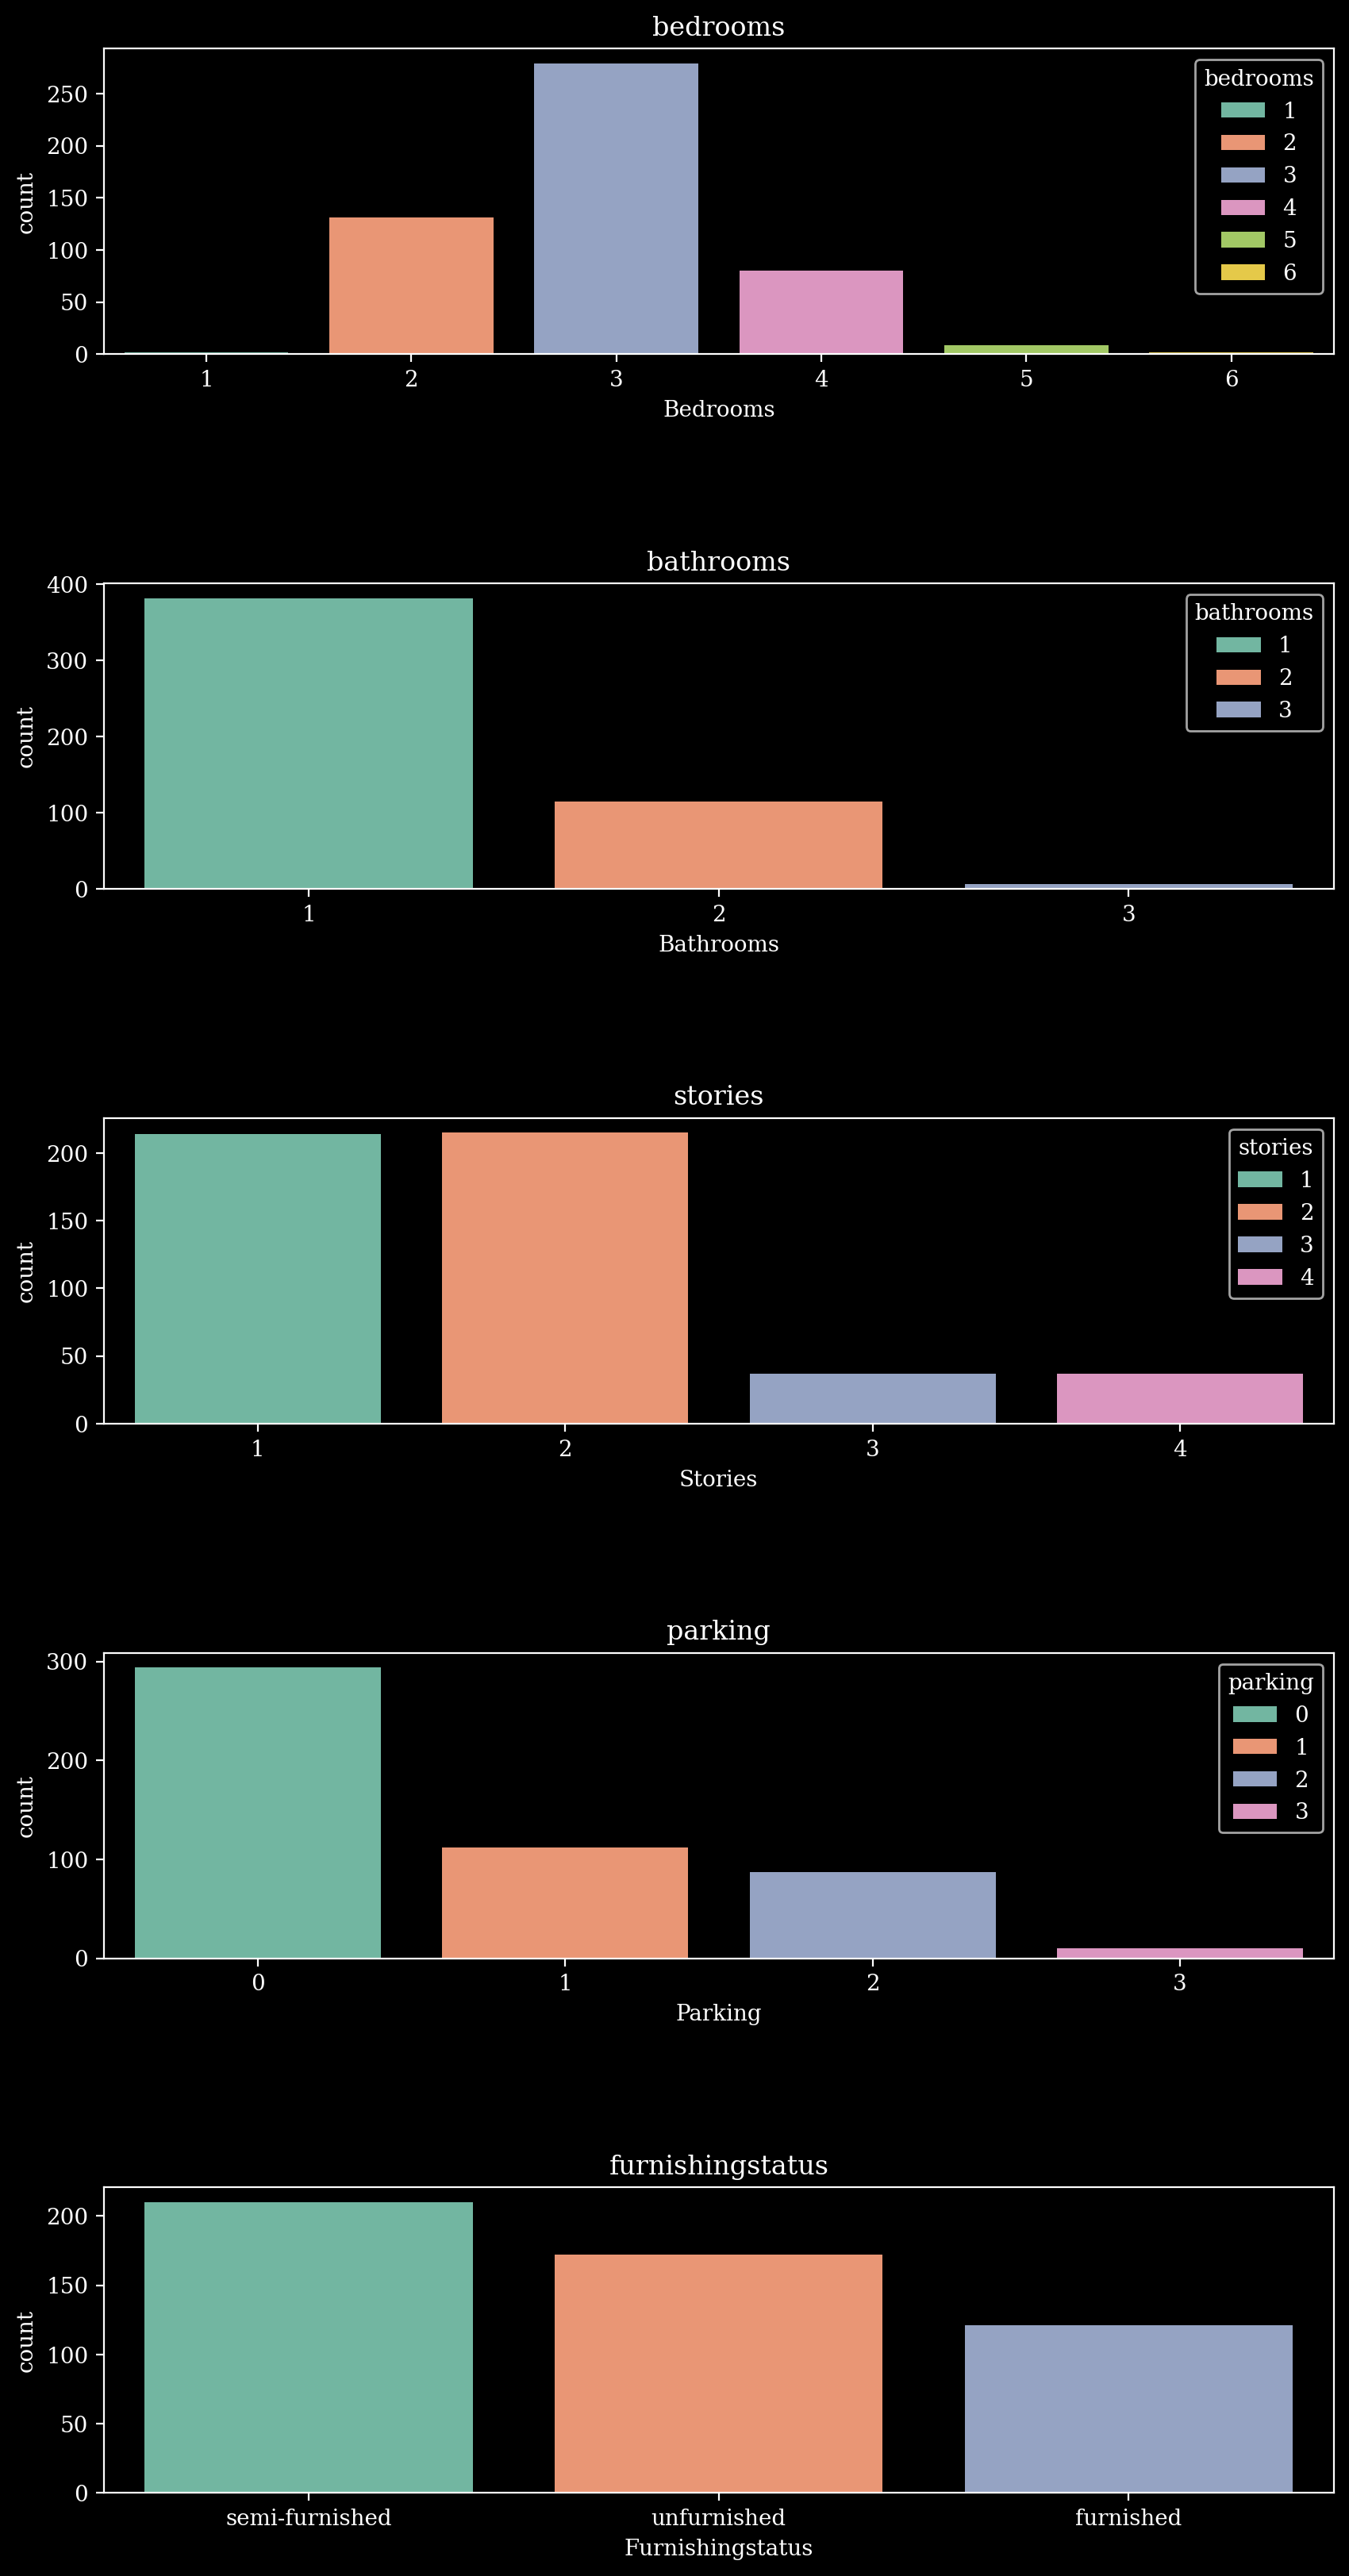

In [ ]:
fig, ax = plt.subplots(nrows = len(variables_categoricas), ncols = 1, figsize = (10, 20))
fig.subplots_adjust(hspace = 0.75)

for i, col in enumerate(variables_categoricas):
    sns.countplot(x = col, data = df, ax = ax[i], palette = "Set2", hue = col)
    ax[i].set_title(col)
    ax[i].set_xlabel(ax[i].get_xlabel().capitalize())

plt.show()

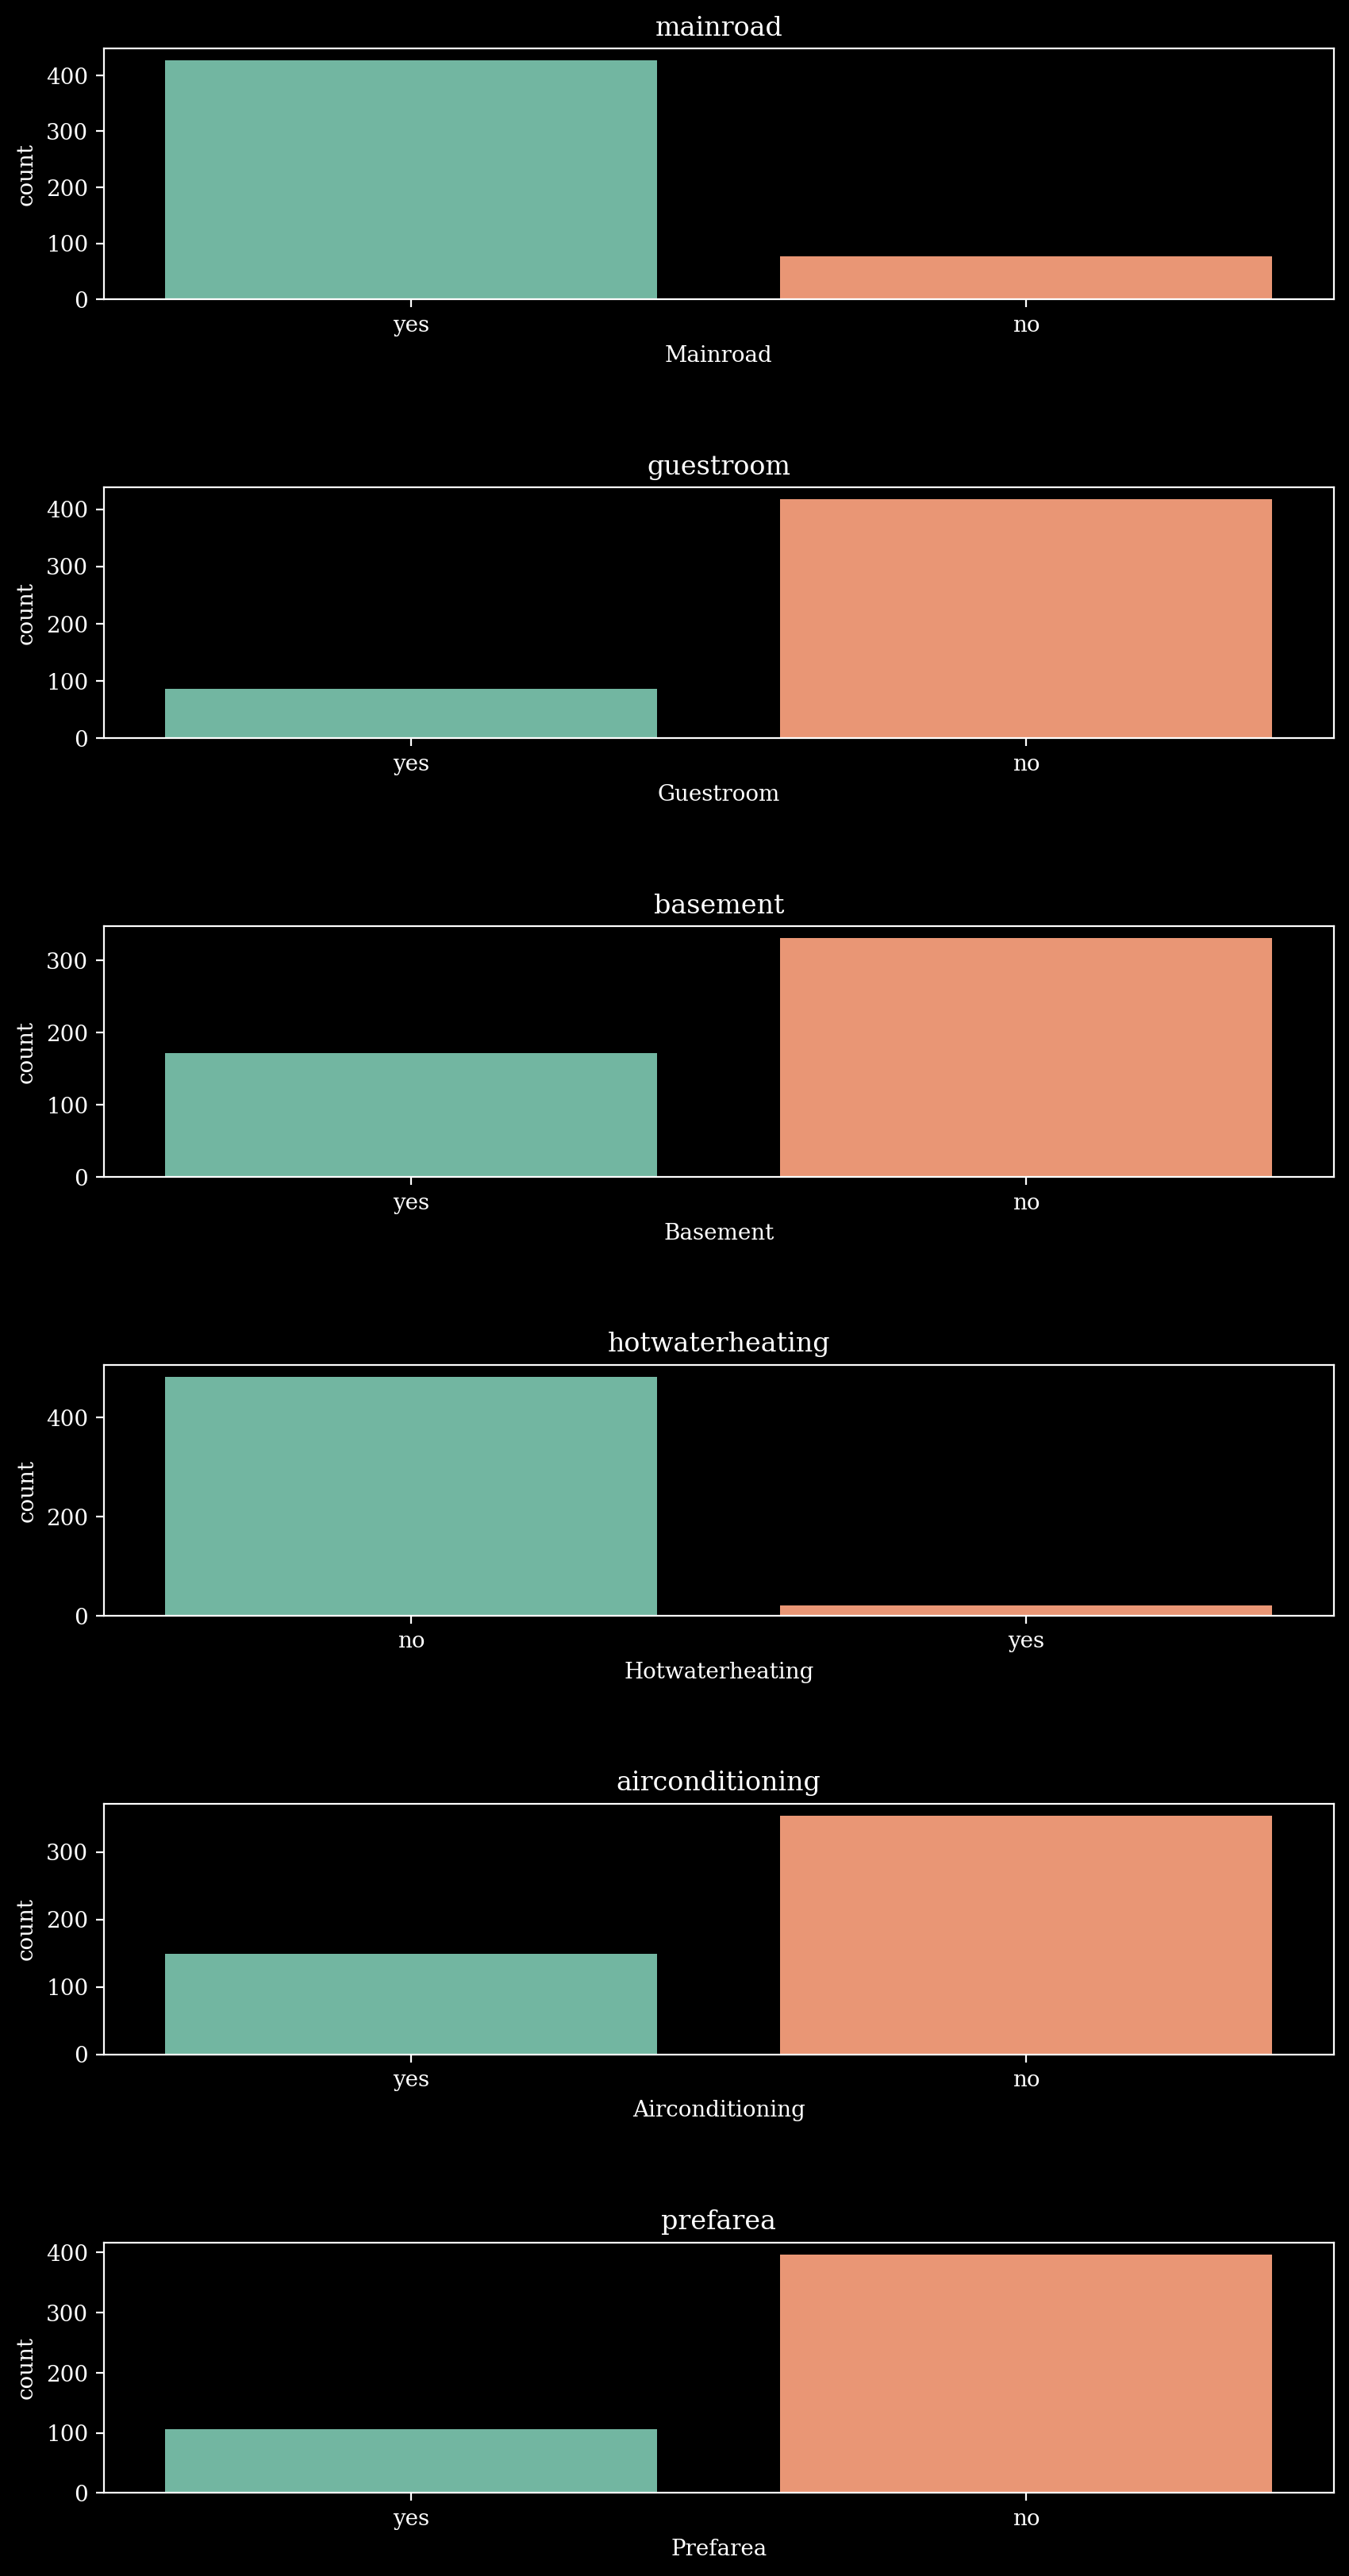

In [ ]:
fig, ax = plt.subplots(nrows = len(variables_dicotomicas), ncols = 1, figsize = (10, 20))
fig.subplots_adjust(hspace = 0.75)

for i, col in enumerate(variables_dicotomicas):
    sns.countplot(x = col, data = df, ax = ax[i], palette = "Set2", hue = col)
    ax[i].set_title(col)
    ax[i].set_xlabel(ax[i].get_xlabel().capitalize())

plt.show()

## Tratamiendo de variables 😲

Para preparar los datos antes de aplicar el modelo de regresión, se realizó un tratamiento adecuado de las variables. En particular, las variables categóricas fueron transformadas mediante codificación *dummy*, lo cual permite representarlas numéricamente sin introducir un orden artificial. Este procedimiento garantiza que el modelo pueda interpretar correctamente la información cualitativa y considerarla en el análisis sin sesgos.


In [ ]:
# Las variables dicotómicas que se tienen se cambiaran a 0 y 1.
# Por ejemplo en el caso de 'mainroad' yes=1, no=0
for col in variables_dicotomicas:
    df[col] = df[col].map({'yes': 1, 'no': 0})
df


price  area  bedrooms  bathrooms  stories  mainroad  guestroom  \
26   8463000  6000         3          2        4         1          1   
27   8400000  8875         3          1        1         1          0   
28   8400000  7950         5          2        2         1          0   
29   8400000  5500         4          2        2         1          0   
30   8400000  7475         3          2        4         1          0   
..       ...   ...       ...        ...      ...       ...        ...   
540  1820000  3000         2          1        1         1          0   
541  1767150  2400         3          1        1         0          0   
542  1750000  3620         2          1        1         1          0   
543  1750000  2910         3          1        1         0          0   
544  1750000  3850         3          1        2         1          0   

     basement  hotwaterheating  airconditioning  parking  prefarea  \
26          1                0                1        0         1   
27          0                0                0        1         0   
28          1                1                0        2         0   
29          1                0                1        1         1   
30          0                0                1        2         0   
..        ...              ...              ...      ...       ...   
540         1                0                0        2         0   
541         0                0                0        0         0   
542         0                0                0        0         0   
543         0                0                0        0         0   
544         0                0                0        0         0   

    furnishingstatus  
26    semi-furnished  
27    semi-furnished  
28       unfurnished  
29    semi-furnished  
30       unfurnished  
..               ...  
540      unfurnished  
541   semi-furnished  
542      unfurnished  
543        furnished  
544      unfurnished  

[503 rows x 13 columns]

In [ ]:
# Creamos una variable dummy para 'furnishingstatus'
dummies = pd.get_dummies(df['furnishingstatus'], drop_first=False)
dummies = dummies.astype(int)
df = pd.concat([df, dummies], axis=1)
# Eliminamos la columna 'furnishingstatus'
df.drop('furnishingstatus', axis=1, inplace=True)
df


price  area  bedrooms  bathrooms  stories  mainroad  guestroom  \
26   8463000  6000         3          2        4         1          1   
27   8400000  8875         3          1        1         1          0   
28   8400000  7950         5          2        2         1          0   
29   8400000  5500         4          2        2         1          0   
30   8400000  7475         3          2        4         1          0   
..       ...   ...       ...        ...      ...       ...        ...   
540  1820000  3000         2          1        1         1          0   
541  1767150  2400         3          1        1         0          0   
542  1750000  3620         2          1        1         1          0   
543  1750000  2910         3          1        1         0          0   
544  1750000  3850         3          1        2         1          0   

     basement  hotwaterheating  airconditioning  parking  prefarea  furnished  \
26          1                0                1        0         1          0   
27          0                0                0        1         0          0   
28          1                1                0        2         0          0   
29          1                0                1        1         1          0   
30          0                0                1        2         0          0   
..        ...              ...              ...      ...       ...        ...   
540         1                0                0        2         0          0   
541         0                0                0        0         0          0   
542         0                0                0        0         0          0   
543         0                0                0        0         0          1   
544         0                0                0        0         0          0   

     semi-furnished  unfurnished  
26                1            0  
27                1            0  
28                0            1  
29                1            0  
30                0            1  
..              ...          ...  
540               0            1  
541               1            0  
542               0            1  
543               0            0  
544               0            1  

[503 rows x 15 columns]

In [ ]:
# Cuntos registros nulos hay en el DataFrame
df.isnull().sum()

price              0
area               0
bedrooms           0
bathrooms          0
stories            0
mainroad           0
guestroom          0
basement           0
hotwaterheating    0
airconditioning    0
parking            0
prefarea           0
furnished          0
semi-furnished     0
unfurnished        0
dtype: int64

In [ ]:
# Descripción de nuestro modelo con las nuevas columnas
df.describe()

price         area   bedrooms   bathrooms     stories  \
count  5.030000e+02   503.000000  503.00000  503.000000  503.000000   
mean   4.475253e+06  4822.608350    2.93837    1.252485    1.795229   
std    1.487419e+06  1723.080241    0.73486    0.461537    0.867644   
min    1.750000e+06  1650.000000    1.00000    1.000000    1.000000   
25%    3.360000e+06  3511.000000    2.00000    1.000000    1.000000   
50%    4.200000e+06  4410.000000    3.00000    1.000000    2.000000   
75%    5.460000e+06  6000.000000    3.00000    1.000000    2.000000   
max    8.463000e+06  9860.000000    6.00000    3.000000    4.000000   

         mainroad   guestroom    basement  hotwaterheating  airconditioning  \
count  503.000000  503.000000  503.000000       503.000000       503.000000   
mean     0.846918    0.170974    0.341948         0.041750         0.296223   
std      0.360425    0.376861    0.474835         0.200215         0.457045   
min      0.000000    0.000000    0.000000         0.000000         0.000000   
25%      1.000000    0.000000    0.000000         0.000000         0.000000   
50%      1.000000    0.000000    0.000000         0.000000         0.000000   
75%      1.000000    0.000000    1.000000         0.000000         1.000000   
max      1.000000    1.000000    1.000000         1.000000         1.000000   

          parking    prefarea   furnished  semi-furnished  unfurnished  
count  503.000000  503.000000  503.000000      503.000000   503.000000  
mean     0.628231    0.210736    0.240557        0.417495     0.341948  
std      0.836754    0.408237    0.427847        0.493637     0.474835  
min      0.000000    0.000000    0.000000        0.000000     0.000000  
25%      0.000000    0.000000    0.000000        0.000000     0.000000  
50%      0.000000    0.000000    0.000000        0.000000     0.000000  
75%      1.000000    0.000000    0.000000        1.000000     1.000000  
max      3.000000    1.000000    1.000000        1.000000     1.000000

In [ ]:
# Se puede observar que ahora nuestras variables son de tipo int64 en lugar de object
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 503 entries, 26 to 544
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   price            503 non-null    int64
 1   area             503 non-null    int64
 2   bedrooms         503 non-null    int64
 3   bathrooms        503 non-null    int64
 4   stories          503 non-null    int64
 5   mainroad         503 non-null    int64
 6   guestroom        503 non-null    int64
 7   basement         503 non-null    int64
 8   hotwaterheating  503 non-null    int64
 9   airconditioning  503 non-null    int64
 10  parking          503 non-null    int64
 11  prefarea         503 non-null    int64
 12  furnished        503 non-null    int64
 13  semi-furnished   503 non-null    int64
 14  unfurnished      503 non-null    int64
dtypes: int64(15)
memory usage: 62.9 KB


In [ ]:
df.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnished', 'semi-furnished', 'unfurnished'],
      dtype='object')

In [ ]:
df['price']

26     8463000
27     8400000
28     8400000
29     8400000
30     8400000
        ...   
540    1820000
541    1767150
542    1750000
543    1750000
544    1750000
Name: price, Length: 503, dtype: int64

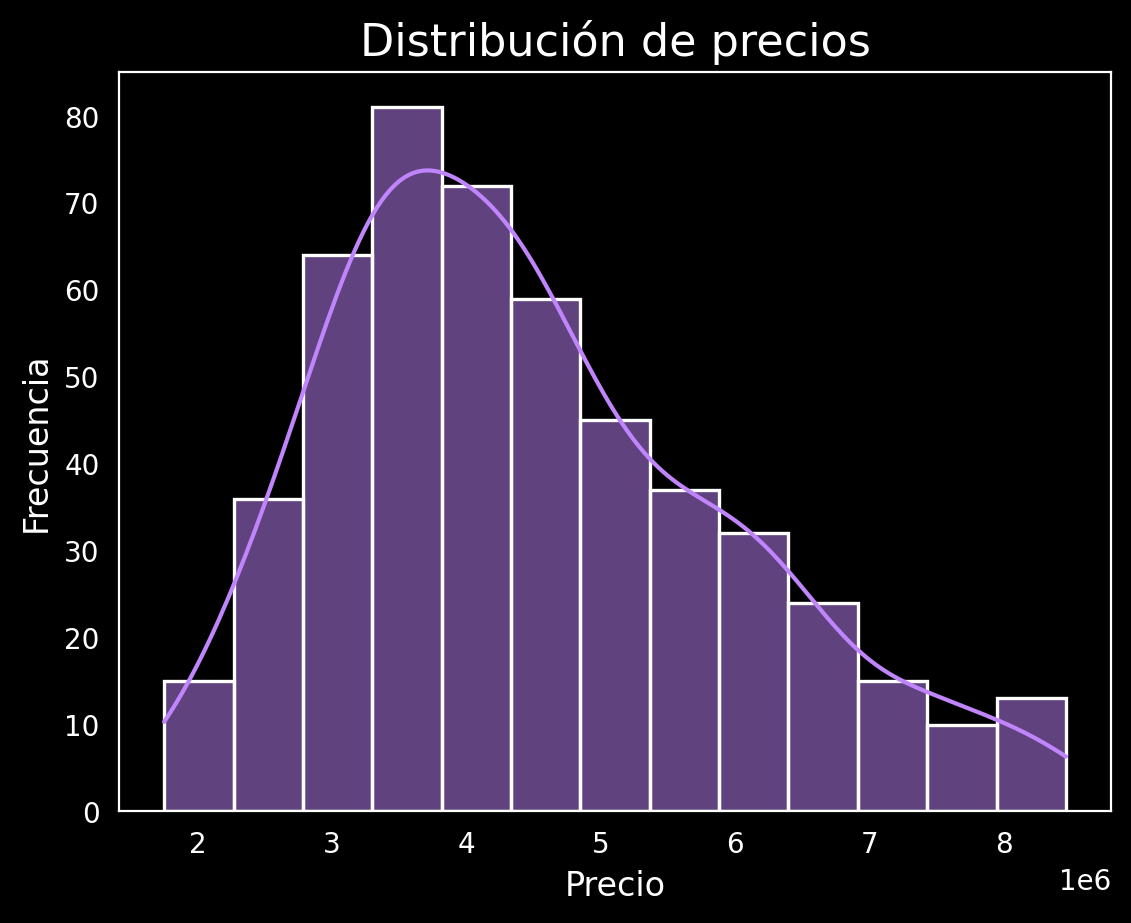

In [ ]:
sns.set_style("dark")
plt.style.use('dark_background')


sns.set_palette(['#c084fc'])
# Creamos el histograma con color y estilo personalizados
sns.histplot(data=df, x='price', kde=True, color='#c084fc', edgecolor='white', linewidth=1.2)
# Ponemos título y etiquetas a la gráfica
plt.title('Distribución de precios', fontsize=16, color='white')
plt.xlabel('Precio', fontsize=12, color='white')
plt.ylabel('Frecuencia', fontsize=12, color='white')

plt.tick_params(colors='white')

plt.gca().set_facecolor('black')
plt.gcf().set_facecolor('black')

plt.show()

## Mapa de correlación📊

A continuación, se presenta la matriz de correlación de las variables numéricas del conjunto de datos. Esta matriz permite identificar la fuerza y dirección de las relaciones lineales entre pares de variables. En particular, se pone atención a las correlaciones que existen entre las variables predictoras y la variable objetivo **price**, ya que una alta correlación puede indicar una mayor relevancia para el modelo de regresión. Asimismo, se revisan posibles casos de multicolinealidad entre las variables independientes.


In [ ]:
var_variables=['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnished', 'semi-furnished', 'unfurnished']
df[var_variables]

price  area  bedrooms  bathrooms  stories  mainroad  guestroom  \
26   8463000  6000         3          2        4         1          1   
27   8400000  8875         3          1        1         1          0   
28   8400000  7950         5          2        2         1          0   
29   8400000  5500         4          2        2         1          0   
30   8400000  7475         3          2        4         1          0   
..       ...   ...       ...        ...      ...       ...        ...   
540  1820000  3000         2          1        1         1          0   
541  1767150  2400         3          1        1         0          0   
542  1750000  3620         2          1        1         1          0   
543  1750000  2910         3          1        1         0          0   
544  1750000  3850         3          1        2         1          0   

     basement  hotwaterheating  airconditioning  parking  prefarea  furnished  \
26          1                0                1        0         1          0   
27          0                0                0        1         0          0   
28          1                1                0        2         0          0   
29          1                0                1        1         1          0   
30          0                0                1        2         0          0   
..        ...              ...              ...      ...       ...        ...   
540         1                0                0        2         0          0   
541         0                0                0        0         0          0   
542         0                0                0        0         0          0   
543         0                0                0        0         0          1   
544         0                0                0        0         0          0   

     semi-furnished  unfurnished  
26                1            0  
27                1            0  
28                0            1  
29                1            0  
30                0            1  
..              ...          ...  
540               0            1  
541               1            0  
542               0            1  
543               0            0  
544               0            1  

[503 rows x 15 columns]

In [ ]:
df[var_variables].corr()

price      area  bedrooms  bathrooms   stories  mainroad  \
price            1.000000  0.543779  0.338806   0.455113  0.476219  0.307959   
area             0.543779  1.000000  0.141697   0.169832  0.126218  0.300373   
bedrooms         0.338806  0.141697  1.000000   0.345511  0.408194 -0.028170   
bathrooms        0.455113  0.169832  0.345511   1.000000  0.308448  0.017260   
stories          0.476219  0.126218  0.408194   0.308448  1.000000  0.122512   
mainroad         0.307959  0.300373 -0.028170   0.017260  0.122512  1.000000   
guestroom        0.279812  0.223307  0.066896   0.129258  0.040271  0.090414   
basement         0.172420  0.051317  0.089060   0.123370 -0.168164  0.038760   
hotwaterheating  0.069685 -0.010467  0.044601   0.058157  0.026377 -0.021678   
airconditioning  0.455062  0.252281  0.149362   0.145238  0.298946  0.094434   
parking          0.281081  0.341223  0.101967   0.109428  0.018405  0.187414   
prefarea         0.301206  0.183543  0.063299   0.023646  0.032089  0.192607   
furnished        0.188460  0.119902  0.066255   0.095324  0.090030  0.123016   
semi-furnished   0.111410  0.014174  0.060089   0.043526  0.000009  0.012843   
unfurnished     -0.285633 -0.122772 -0.122167  -0.131140 -0.081131 -0.124195   

                 guestroom  basement  hotwaterheating  airconditioning  \
price             0.279812  0.172420         0.069685         0.455062   
area              0.223307  0.051317        -0.010467         0.252281   
bedrooms          0.066896  0.089060         0.044601         0.149362   
bathrooms         0.129258  0.123370         0.058157         0.145238   
stories           0.040271 -0.168164         0.026377         0.298946   
mainroad          0.090414  0.038760        -0.021678         0.094434   
guestroom         1.000000  0.362819        -0.015589         0.110158   
basement          0.362819  1.000000        -0.024744         0.027993   
hotwaterheating  -0.015589 -0.024744         1.000000        -0.113649   
airconditioning   0.110158  0.027993        -0.113649         1.000000   
parking           0.025093  0.029803         0.045269         0.106227   
prefarea          0.192624  0.244101        -0.034741         0.081145   
furnished         0.090338  0.055148        -0.024457         0.123845   
semi-furnished    0.033146  0.061112         0.065154        -0.019484   
unfurnished      -0.115857 -0.113223        -0.045698        -0.091334   

                  parking  prefarea  furnished  semi-furnished  unfurnished  
price            0.281081  0.301206   0.188460        0.111410    -0.285633  
area             0.341223  0.183543   0.119902        0.014174    -0.122772  
bedrooms         0.101967  0.063299   0.066255        0.060089    -0.122167  
bathrooms        0.109428  0.023646   0.095324        0.043526    -0.131140  
stories          0.018405  0.032089   0.090030        0.000009    -0.081131  
mainroad         0.187414  0.192607   0.123016        0.012843    -0.124195  
guestroom        0.025093  0.192624   0.090338        0.033146    -0.115857  
basement         0.029803  0.244101   0.055148        0.061112    -0.113223  
hotwaterheating  0.045269 -0.034741  -0.024457        0.065154    -0.045698  
airconditioning  0.106227  0.081145   0.123845       -0.019484    -0.091334  
parking          1.000000  0.049029   0.083376        0.058218    -0.135648  
prefarea         0.049029  1.000000   0.096954       -0.022285    -0.064192  
furnished        0.083376  0.096954   1.000000       -0.476471    -0.405706  
semi-furnished   0.058218 -0.022285  -0.476471        1.000000    -0.610276  
unfurnished     -0.135648 -0.064192  -0.405706       -0.610276     1.000000

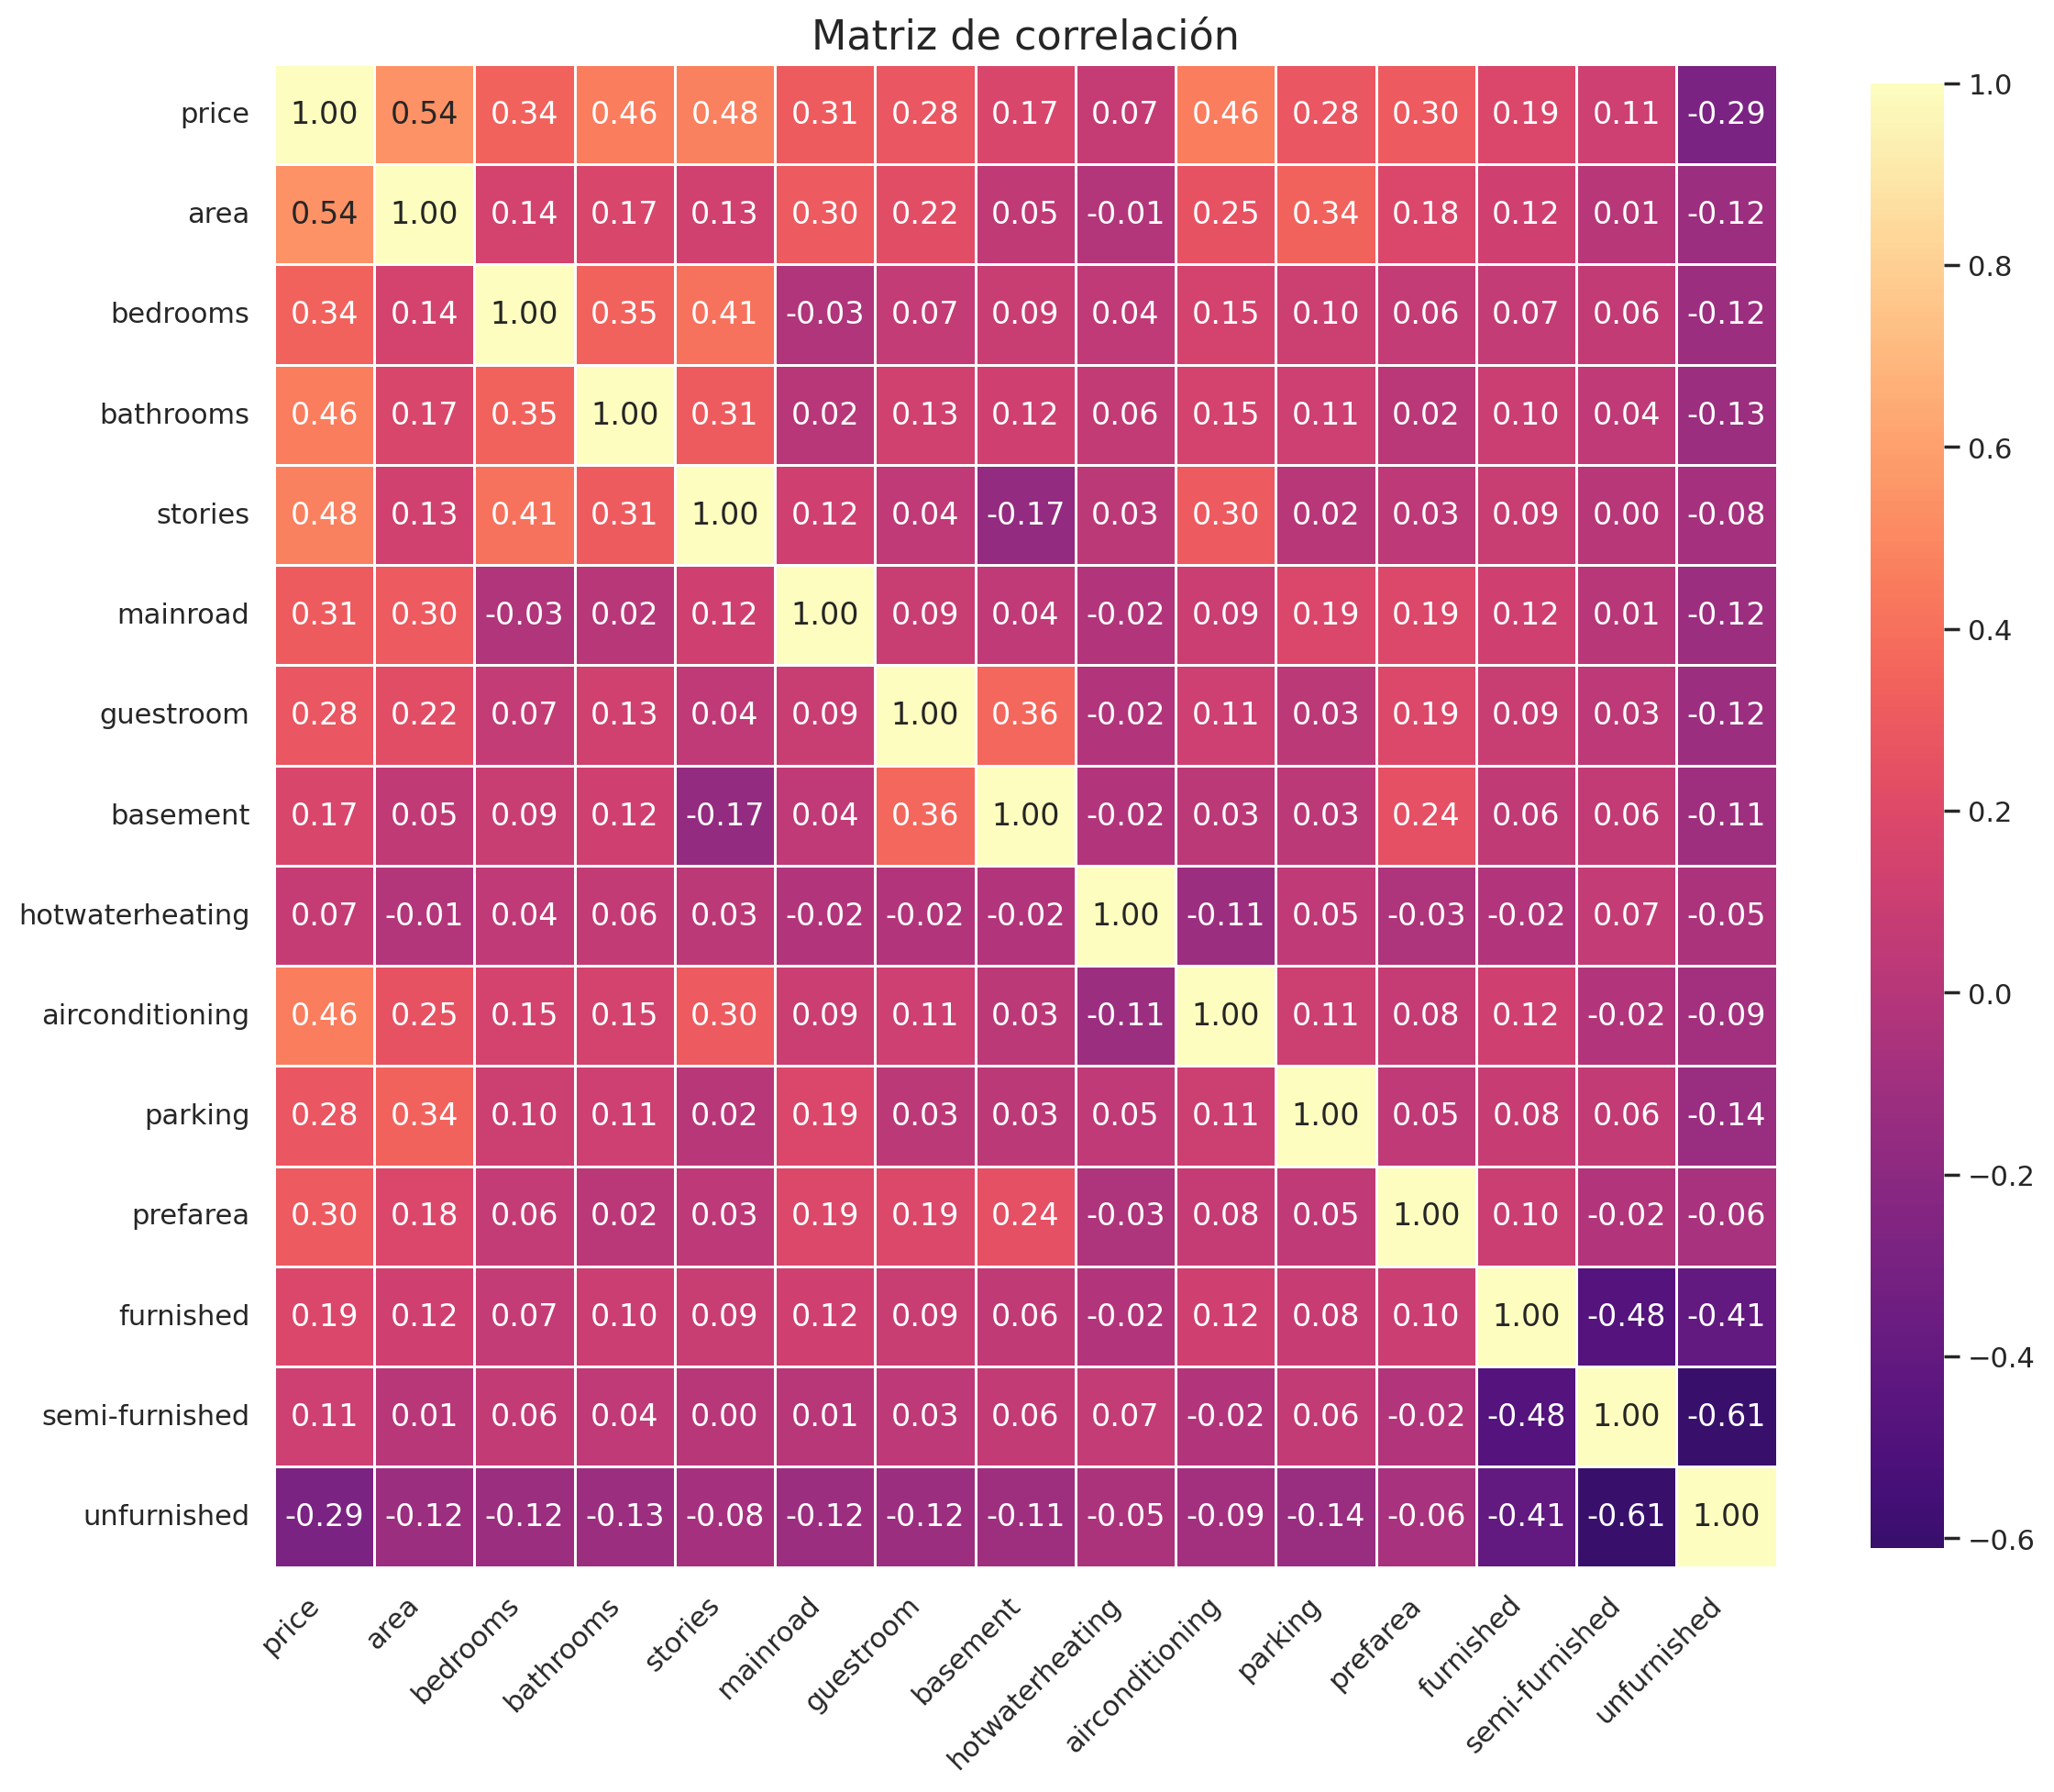

In [ ]:
plt.figure(figsize=(12, 12))
sns.heatmap(df[var_variables].corr(),
            annot=True,
            fmt=".2f",
            cmap="magma",
            center=0,
            linewidths=0.5,
            linecolor='white',
            square=True,
            cbar_kws={"shrink": .7}
           )

plt.title("Matriz de correlación", fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

###  Análisis de la matriz de correlación

Al examinar la matriz, se observa que las variables más fuertemente asociadas con el precio son: el área construida *area*, el número de baños *bathrooms*, la presencia de aire acondicionado *airconditioning* y el número de pisos *stories*. Estas variables presentan correlaciones positivas moderadas con **price**, lo que indica que a medida que aumentan estas características, también tiende a aumentar el valor de la propiedad. En particular:

- *area* muestra la correlación más alta (~0.54), lo que sugiere que el tamaño es un factor clave en la determinación del precio.
- *bathrooms* (0.52) y *airconditioning* (0.45) también presentan correlaciones destacadas, probablemente debido a su impacto en la comodidad y funcionalidad del inmueble.
- *stories* (~0.42) sugiere que propiedades con más niveles también tienden a tener un mayor valor.

En contraste, variables como el estado de amueblado *unfurnished*, *semi-furnished* muestran correlaciones negativas con **price**`, indicando que las propiedades sin muebles suelen tener precios más bajos. Este comportamiento puede reflejar una preferencia del mercado por inmuebles listos para habitar.

Por otro lado, ciertas variables como la presencia de sótano *basement* y el tipo de calefacción *hotwaterheating* muestran correlaciones muy bajas o cercanas a cero con respecto al precio. Esto puede implicar que dichas características no son determinantes en la valorización de las propiedades, al menos dentro del contexto de este conjunto de datos.


#### 📌 Posibles hipótesis a explorar:
- ¿El efecto del área sobre el precio se mantiene constante o varía dependiendo del estado de amueblado?
- ¿El impacto del número de baños sobre el precio es mayor en zonas residenciales preferentes (`prefarea = yes`)?
- ¿Las propiedades con aire acondicionado tienden a ubicarse en zonas más caras o urbanizadas?

Estas observaciones preliminares nos guían en la selección de variables para el modelo y nos podrían abrir la puerta a análisis más detallados con interacción de variables y modelos ajustados.



## Machine Learning ⚙

Para predecir el precio de las propiedades en función de sus características, se aplicó un modelo de regresión lineal utilizando la librería `scikit-learn`. Este enfoque de *Machine Learning supervisado* nos permitira estimar el valor de una variable continua **price** a partir de múltiples variables predictoras.

Primero, se realizó la división del conjunto de datos en dos subconjuntos mediante la función `train_test_split`: uno para entrenar el modelo (conjunto de entrenamiento) y otro para evaluar su desempeño (conjunto de prueba). Esta estrategia es fundamental para validar la capacidad predictiva del modelo y evitar problemas de sobreajuste.

Posteriormente, se ajustó un modelo de regresión lineal con `LinearRegression`, que estima los coeficientes de cada variable predictora minimizando el error cuadrático medio entre los valores observados y los predichos.

Este modelo permite identificar qué variables influyen de forma significativa en el precio de las propiedades, así como realizar predicciones sobre nuevos datos basados en las características ingresadas.


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [ ]:
#Mostramos nuestro dataframe
df.head()

price  area  bedrooms  bathrooms  stories  mainroad  guestroom  \
26  8463000  6000         3          2        4         1          1   
27  8400000  8875         3          1        1         1          0   
28  8400000  7950         5          2        2         1          0   
29  8400000  5500         4          2        2         1          0   
30  8400000  7475         3          2        4         1          0   

    basement  hotwaterheating  airconditioning  parking  prefarea  furnished  \
26         1                0                1        0         1          0   
27         0                0                0        1         0          0   
28         1                1                0        2         0          0   
29         1                0                1        1         1          0   
30         0                0                1        2         0          0   

    semi-furnished  unfurnished  
26               1            0  
27               1            0  
28               0            1  
29               1            0  
30               0            1

In [ ]:
# Predictores / Variables explicativas
X = df[['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnished', 'semi-furnished', 'unfurnished']]

In [ ]:
#Mostramos las variables explicativas
X.head()


area  bedrooms  bathrooms  stories  mainroad  guestroom  basement  \
26  6000         3          2        4         1          1         1   
27  8875         3          1        1         1          0         0   
28  7950         5          2        2         1          0         1   
29  5500         4          2        2         1          0         1   
30  7475         3          2        4         1          0         0   

    hotwaterheating  airconditioning  parking  prefarea  furnished  \
26                0                1        0         1          0   
27                0                0        1         0          0   
28                1                0        2         0          0   
29                0                1        1         1          0   
30                0                1        2         0          0   

    semi-furnished  unfurnished  
26               1            0  
27               1            0  
28               0            1  
29               1            0  
30               0            1

In [ ]:
# Variable dependiente
Y = df[['price']]
Y

price
26   8463000
27   8400000
28   8400000
29   8400000
30   8400000
..       ...
540  1820000
541  1767150
542  1750000
543  1750000
544  1750000

[503 rows x 1 columns]

In [ ]:
# Separación entre muestras
# Donde ocupamos el 30% de los datos para pruebas y el 70% para entrenamientos
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.3, random_state=42)

In [ ]:

X_train

area  bedrooms  bathrooms  stories  mainroad  guestroom  basement  \
151  4400         4          1        2         1          0         0   
75   4260         4          2        2         1          0         0   
42   6480         3          2        4         1          0         0   
507  3600         2          1        1         1          0         0   
399  7350         2          1        1         1          0         0   
..    ...       ...        ...      ...       ...        ...       ...   
139  6360         3          1        1         1          1         1   
311  6060         2          1        1         1          0         1   
389  4600         4          1        2         1          0         0   
477  4960         2          1        1         1          0         0   
135  6000         3          2        4         1          0         0   

     hotwaterheating  airconditioning  parking  prefarea  furnished  \
151                0                1        2         1          0   
75                 1                0        0         0          0   
42                 0                1        2         0          0   
507                0                0        0         0          0   
399                0                0        1         0          0   
..               ...              ...      ...       ...        ...   
139                0                1        2         1          1   
311                0                0        1         0          0   
389                0                0        0         0          0   
477                0                0        0         0          0   
135                0                1        0         0          0   

     semi-furnished  unfurnished  
151               1            0  
75                1            0  
42                0            1  
507               0            1  
399               1            0  
..              ...          ...  
139               0            0  
311               1            0  
389               1            0  
477               0            1  
135               0            1  

[352 rows x 14 columns]

In [ ]:
Y_train

price
151  5565000
75   6650000
42   7700000
507  2590000
399  3500000
..       ...
139  5740000
311  4123000
389  3500000
477  2940000
135  5775000

[352 rows x 1 columns]

In [ ]:
#Mostramos el numero de filas y columnas
print(Y_test.shape)
print(Y_train.shape)

(151, 1)
(352, 1)


In [ ]:
#Entrenamos el modelo
lrm = LinearRegression()
lrm.fit(X_train, Y_train)

LinearRegression()

In [ ]:
#Predicciones
from sklearn import metrics

In [ ]:
#Regresa un array
predicciones = lrm.predict(X_test)

In [ ]:
Y_test.head()

price
309  4130000
104  6195000
330  3990000
193  5033000
137  5740000

In [ ]:
#Mostramos las predicciones
predicciones

array([[4843083.39307645],
       [5835434.52882456],
       [4431818.94490157],
       [4118505.82395347],
       [4157991.11021967],
       [5286606.73173018],
       [3835204.90269856],
       [5293777.83052816],
       [5444155.772039  ],
       [4840305.48879678],
       [7015630.36619931],
       [5535783.81806874],
       [4061221.2206646 ],
       [6559028.38862929],
       [5479348.52866026],
       [4473324.74514411],
       [3087229.25839811],
       [8405404.85079414],
       [3761242.75178246],
       [2623592.08234061],
       [2867935.93903897],
       [3024297.51642606],
       [4082746.86863129],
       [4143447.87442865],
       [5059493.37573132],
       [2274624.4465779 ],
       [3362023.65387642],
       [3199784.3001241 ],
       [5109339.27400708],
       [4783516.58159865],
       [4061199.62641629],
       [3867585.70090666],
       [2877198.57031882],
       [5687629.18376854],
       [6229229.80602847],
       [4422770.58163618],
       [4435702.71257195],
 

In [ ]:
#Mostramos el numero de filas y columnas de nuestras predicciones
predicciones.shape

(151, 1)

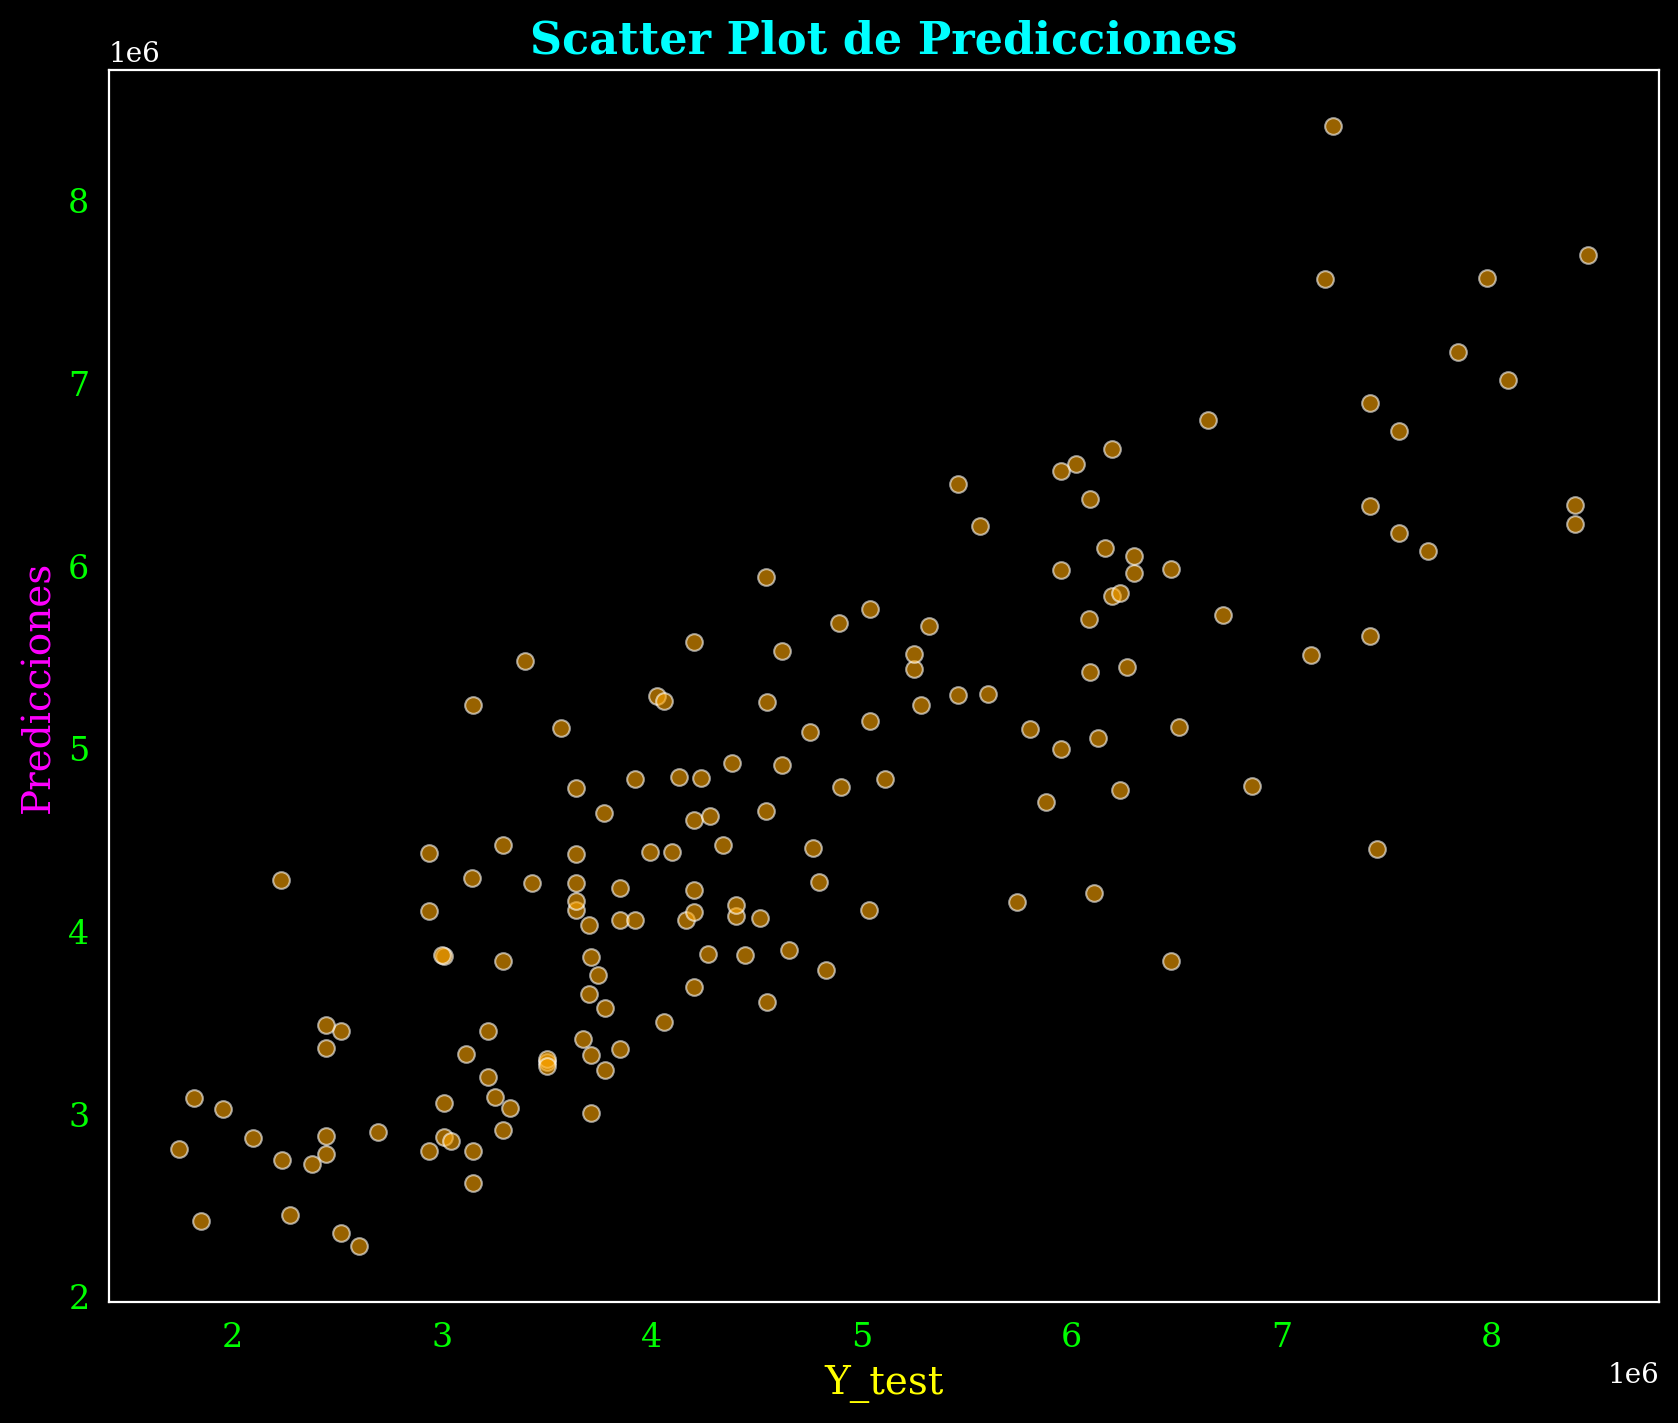

In [ ]:
# Scatter plot de las predicciones
plt.figure(figsize=(10, 8))
#Tipo de letra para el gráfico
plt.rcParams['font.family'] = 'DejaVu Serif'
#Color  de fondo negro
plt.style.use("dark_background")

# Combine Y_test and predicciones into a single DataFrame for scatterplot
# Assuming 'price' is the column name in Y_test and predicciones is a 1D array
scatter_data = pd.DataFrame({'Y_test': Y_test['price'], 'predicciones': predicciones.flatten()})

#Creación del gráfico
sns.scatterplot(x='Y_test', y='predicciones', data=scatter_data, color='orange', alpha=0.6, edgecolors='w', linewidth=0.75)
#Título del gráfico
plt.title('Scatter Plot de Predicciones',fontsize=16,
          color='cyan',fontweight='bold')

#Agregamos las etiquetas de los valores del eje X
plt.xticks(fontsize=12, color='lime')
plt.yticks(fontsize=12, color='lime')
#Etiquetas del gráfico
plt.xlabel("Y_test",fontsize=14,color='yellow')
plt.ylabel("Predicciones",fontsize=14,color='fuchsia')
#Mostramos el gráfico
plt.show()


In [ ]:
sns.set_palette(['darkorange'])
# Distribución de los errores
sns.histplot(Y_test - predicciones, kde=True, color='darkorange', bins=30)
sns.kdeplot(Y_test - predicciones, color='darkorange', linewidth=2)

#Ponemos los titulos
plt.title('Distribución de los Errores', fontsize=14)
plt.xlabel('Error (Y_test - Predicciones)', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)

#Mostramos la grafica
plt.show()


## Métricas📏

Para analizar la precisión del modelo de regresión lineal, se calcularon dos métricas clave: el **Error Absoluto Medio (MAE)** y el **Error Cuadrático Medio (MSE)**, las cuales permiten evaluar la magnitud del error entre los valores reales y los predichos.

- El **MAE** indica el promedio de los errores absolutos, es decir, mide en promedio cuánto se desvía el modelo al predecir el precio de una propiedad. Esta métrica es útil por su interpretación directa en las mismas unidades que la variable objetivo.

- El **MSE**, por otro lado, penaliza con mayor fuerza los errores grandes al elevar al cuadrado las diferencias entre los valores reales y predichos. Esto lo convierte en una métrica más sensible a valores atípicos y útil para detectar errores extremos en las predicciones.

Ambas métricas reflejan la capacidad predictiva del modelo, y valores bajos en ellas indican un mejor desempeño en términos de aproximación a los precios reales.


In [ ]:
# Métricas
mae  = metrics.mean_absolute_error(Y_test, predicciones)
mse = metrics.mean_squared_error(Y_test, predicciones)
rmse = np.sqrt(mse)

df_errores = pd.DataFrame({
    'Métrica': ['MAE (Mean absolute error)', 'MSE (Mean Square error)', 'RMSE (Root Mean Squere Error)'],
    'Valor': [mae, mse, rmse]
})
df_errores

Métrica         Valor
0      MAE (Mean absolute error)  6.926662e+05
1        MSE (Mean Square error)  8.042520e+11
2  RMSE (Root Mean Squere Error)  8.968010e+05

Los resultados obtenidos indican que:

- El **MAE** de aproximadamente \$920,393 sugiere que, en promedio, el modelo se equivoca por esa cantidad al predecir el precio de una propiedad.
- El **MSE** es elevado (\$1.52 × 10¹²), lo cual es esperable debido a que los errores están al cuadrado y puede estar influenciado por valores atípicos.
- El **RMSE** de \$1,234,107 proporciona una medida de la magnitud típica del error de predicción y, al estar en las mismas unidades que el precio, resulta útil para contextualizar la precisión del modelo.

En general, aunque el modelo tiene un desempeño aceptable, los errores todavía son grandes en términos absolutos, lo que sugiere que podría beneficiarse de un ajuste o de la inclusión de variables adicionales.


## Coeficiente de determinación $(R^2)$ 💡

In [ ]:
# Coeficiente de determinacion R2
r2_total = lrm.score(X, Y)
r2_test = lrm.score(X_test, Y_test)
r2_train = lrm.score(X_train, Y_train)

df_r2 = pd.DataFrame({
    'Conjunto': ['Total (X, Y)', 'Test (X_test, Y_test)', 'Train (X_train, Y_train)'],
    'Coeficiente de Determinación R²': [r2_total, r2_test, r2_train]
})
df_r2

Conjunto  Coeficiente de Determinación R²
0              Total (X, Y)                         0.669694
1     Test (X_test, Y_test)                         0.692552
2  Train (X_train, Y_train)                         0.655409

Los resultados obtenidos indican que:

- El $R^2$ en el conjunto **Total (X, Y)** es de **0.6758**, lo que sugiere que el modelo explica el **67.58%** de la variabilidad total de la variable dependiente $Y$ en función de $X$. Esto indica que, en general, el modelo tiene un ajuste razonable a los datos.

- El $R^2$ en el conjunto de **Test (X_test, Y_test)** es de **0.6463**, lo que sugiere que el **64.63%** de la variabilidad en los datos de prueba es explicada por el modelo. Este valor es un poco más bajo que el de los datos de entrenamiento, lo que indica que el modelo podría estar perdiendo algo de precisión al generalizar a nuevos datos, lo cual es normal en modelos que podrían sobreajustarse.

- El  $R^2$ en el conjunto de **Train (X_train, Y_train)** es de **0.6932**, lo que indica que el **69.32%** de la variabilidad en los datos de entrenamiento es explicada por el modelo. Este valor es mayor que el de los datos de prueba, sugiriendo que el modelo se ajusta bien a los datos de entrenamiento, pero podría estar ligeramente sobreajustado.

En general, el modelo tiene un buen ajuste y es capaz de explicar una proporción significativa de la variabilidad en ambos conjuntos, aunque la ligera diferencia entre los valores de $R^2$ en el conjunto de entrenamiento y prueba sugiere que el modelo podría beneficiarse de un ajuste adicional para mejorar su capacidad de generalización.

## Coeficientes🧮

In [ ]:
#Mostramos el nombre de nuestras columnas explicativas
X.columns

Index(['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom',
       'basement', 'hotwaterheating', 'airconditioning', 'parking', 'prefarea',
       'furnished', 'semi-furnished', 'unfurnished'],
      dtype='object')

In [ ]:
X.head()

area  bedrooms  bathrooms  stories  mainroad  guestroom  basement  \
26  6000         3          2        4         1          1         1   
27  8875         3          1        1         1          0         0   
28  7950         5          2        2         1          0         1   
29  5500         4          2        2         1          0         1   
30  7475         3          2        4         1          0         0   

    hotwaterheating  airconditioning  parking  prefarea  furnished  \
26                0                1        0         1          0   
27                0                0        1         0          0   
28                1                0        2         0          0   
29                0                1        1         1          0   
30                0                1        2         0          0   

    semi-furnished  unfurnished  
26               1            0  
27               1            0  
28               0            1  
29               1            0  
30               0            1

In [ ]:
lrm.coef_

array([[ 2.38971546e+02,  8.14552686e+04,  7.08717892e+05,
         3.83431776e+05,  3.65635960e+05,  4.03575177e+05,
         1.85184739e+05,  6.22575923e+05,  8.07142392e+05,
         1.20138337e+05,  5.46939284e+05,  1.27449430e+05,
         1.55189925e+05, -2.82639355e+05]])

Podemos ver tanto las relaciones positivas como negativas de nuestra variable objetivo, respecto a nuestras variables predictoras

##  Least Square con Statmodels📈

In [ ]:
pip install statsmodels

In [ ]:
#Importamos nuevamente las librerias
import numpy as np
import statsmodels.api as sm

In [ ]:
X_sm=sm.add_constant(X_train)
X_sm.head()
model = sm.OLS(Y_train, X_sm)
lrm_results=model.fit()

---
#**f) Tabla de resultados del modelo construido con la interpretación de los resultados de la regresión así como de los elementos de la tabla de summary()**📝
---

In [ ]:
print(lrm_results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.655
Model:                            OLS   Adj. R-squared:                  0.642
Method:                 Least Squares   F-statistic:                     49.45
Date:                Fri, 11 Apr 2025   Prob (F-statistic):           4.39e-70
Time:                        21:45:27   Log-Likelihood:                -5299.0
No. Observations:                 352   AIC:                         1.063e+04
Df Residuals:                     338   BIC:                         1.068e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            4.551e+05   1.83e+05     

In [ ]:
print(lrm_results.summary2())

                         Results: Ordinary least squares
Model:                    OLS                  Adj. R-squared:         0.642     
Dependent Variable:       price                AIC:                    10626.0809
Date:                     2025-04-11 21:45     BIC:                    10680.1717
No. Observations:         352                  Log-Likelihood:         -5299.0   
Df Model:                 13                   F-statistic:            49.45     
Df Residuals:             338                  Prob (F-statistic):     4.39e-70  
R-squared:                0.655                Scale:                  7.2606e+11
---------------------------------------------------------------------------------
                   Coef.       Std.Err.     t    P>|t|     [0.025       0.975]   
---------------------------------------------------------------------------------
const            455097.2990 183459.6807  2.4806 0.0136   94230.7658  815963.8322
area                238.9715     30.5400 

Con base en los resultados de la regresión lineal:

- El modelo tiene un $R^2$ de **0.693**, lo que indica que aproximadamente el **69.3%** de la variabilidad en el precio de la propiedad se explica por las variables independientes.
- Variables como **área, número de baños, número de historias, acceso a la carretera principal, sótano, calefacción de agua, aire acondicionado, estacionamiento y área preferencial** son estadísticamente significativas (valor p < 0.05), lo que sugiere que tienen un impacto importante en el precio de la propiedad.
- **Número de dormitorios, habitación de huéspedes, y condiciones de amueblado (semi-amueblado y sin amueblar)** no son significativos, ya que sus valores p son altos, lo que indica que no contribuyen de manera relevante al modelo.

En resumen, el modelo muestra que ciertas características de la propiedad, como el área, número de baños, y otras comodidades, son factores importantes que influyen en el precio, mientras que otras variables no parecen tener un impacto significativo.


## Mejora del modelo🔎

Al tomar todas las variables se obtuvo que las variables bedrooms, guestroom, furnished, semi-furnished y unfurnished tuvieron al 0 dentro del intervalo, por lo que se decidió realizar la regresión lineal sin estás.


In [ ]:
# Predictores / Variables explicativas
X = df[['area', 'bathrooms', 'stories', 'mainroad',
       'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea']]

In [ ]:
#Mostramos las variables explicativas
X.head()


area  bathrooms  stories  mainroad  basement  hotwaterheating  \
26  6000          2        4         1         1                0   
27  8875          1        1         1         0                0   
28  7950          2        2         1         1                1   
29  5500          2        2         1         1                0   
30  7475          2        4         1         0                0   

    airconditioning  parking  prefarea  
26                1        0         1  
27                0        1         0  
28                0        2         0  
29                1        1         1  
30                1        2         0

In [ ]:
# Variable dependiente
Y = df[['price']]
Y

price
26   8463000
27   8400000
28   8400000
29   8400000
30   8400000
..       ...
540  1820000
541  1767150
542  1750000
543  1750000
544  1750000

[503 rows x 1 columns]

In [ ]:
# Separación entre muestras
# Donde ocupamos el 30% de los datos para pruebas y el 70% para entrenamientos
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.3, random_state=42)

In [ ]:
X_train

area  bathrooms  stories  mainroad  basement  hotwaterheating  \
151  4400          1        2         1         0                0   
75   4260          2        2         1         0                1   
42   6480          2        4         1         0                0   
507  3600          1        1         1         0                0   
399  7350          1        1         1         0                0   
..    ...        ...      ...       ...       ...              ...   
139  6360          1        1         1         1                0   
311  6060          1        1         1         1                0   
389  4600          1        2         1         0                0   
477  4960          1        1         1         0                0   
135  6000          2        4         1         0                0   

     airconditioning  parking  prefarea  
151                1        2         1  
75                 0        0         0  
42                 1        2         0  
507                0        0         0  
399                0        1         0  
..               ...      ...       ...  
139                1        2         1  
311                0        1         0  
389                0        0         0  
477                0        0         0  
135                1        0         0  

[352 rows x 9 columns]

In [ ]:
Y_train

price
151  5565000
75   6650000
42   7700000
507  2590000
399  3500000
..       ...
139  5740000
311  4123000
389  3500000
477  2940000
135  5775000

[352 rows x 1 columns]

In [ ]:
#Mostramos el numero de filas y de columnas
print(Y_test.shape)
print(Y_train.shape)

(151, 1)
(352, 1)


In [ ]:
#Entrenamos el modelo
lrm = LinearRegression()
lrm.fit(X_train, Y_train)

LinearRegression()

In [ ]:
#Predicciones
from sklearn import metrics

In [ ]:
#Regresa un array
predicciones = lrm.predict(X_test)

In [ ]:
Y_test.head()

price
309  4130000
104  6195000
330  3990000
193  5033000
137  5740000

In [ ]:
#Moatramos las predicciones
predicciones

array([[4559804.13250884],
       [5569488.29581489],
       [4569217.07556709],
       [3725406.55751185],
       [3905974.47649239],
       [5226427.73652836],
       [3537599.73538365],
       [4862284.37987114],
       [5517206.33273985],
       [4285039.35745599],
       [7114199.80165044],
       [4980483.95563803],
       [4037012.86600893],
       [6259953.17732108],
       [5108622.62981488],
       [4054928.57424073],
       [3547863.20601172],
       [8092589.29667168],
       [3619928.96811709],
       [3001555.24838386],
       [3133207.24408816],
       [3102251.30804652],
       [3901028.42952902],
       [3979201.59132103],
       [5627047.00498281],
       [2530858.64142105],
       [3747595.86292251],
       [3023793.68501583],
       [5195904.71457952],
       [4685069.40707101],
       [4398868.15823772],
       [3450804.87690445],
       [2763763.2200968 ],
       [5664113.33475604],
       [6718421.42438864],
       [4466790.7407038 ],
       [4274180.58584099],
 

In [ ]:
#Mostramos el numero de filas y columnas de nuestras predicciones
predicciones.shape

(151, 1)

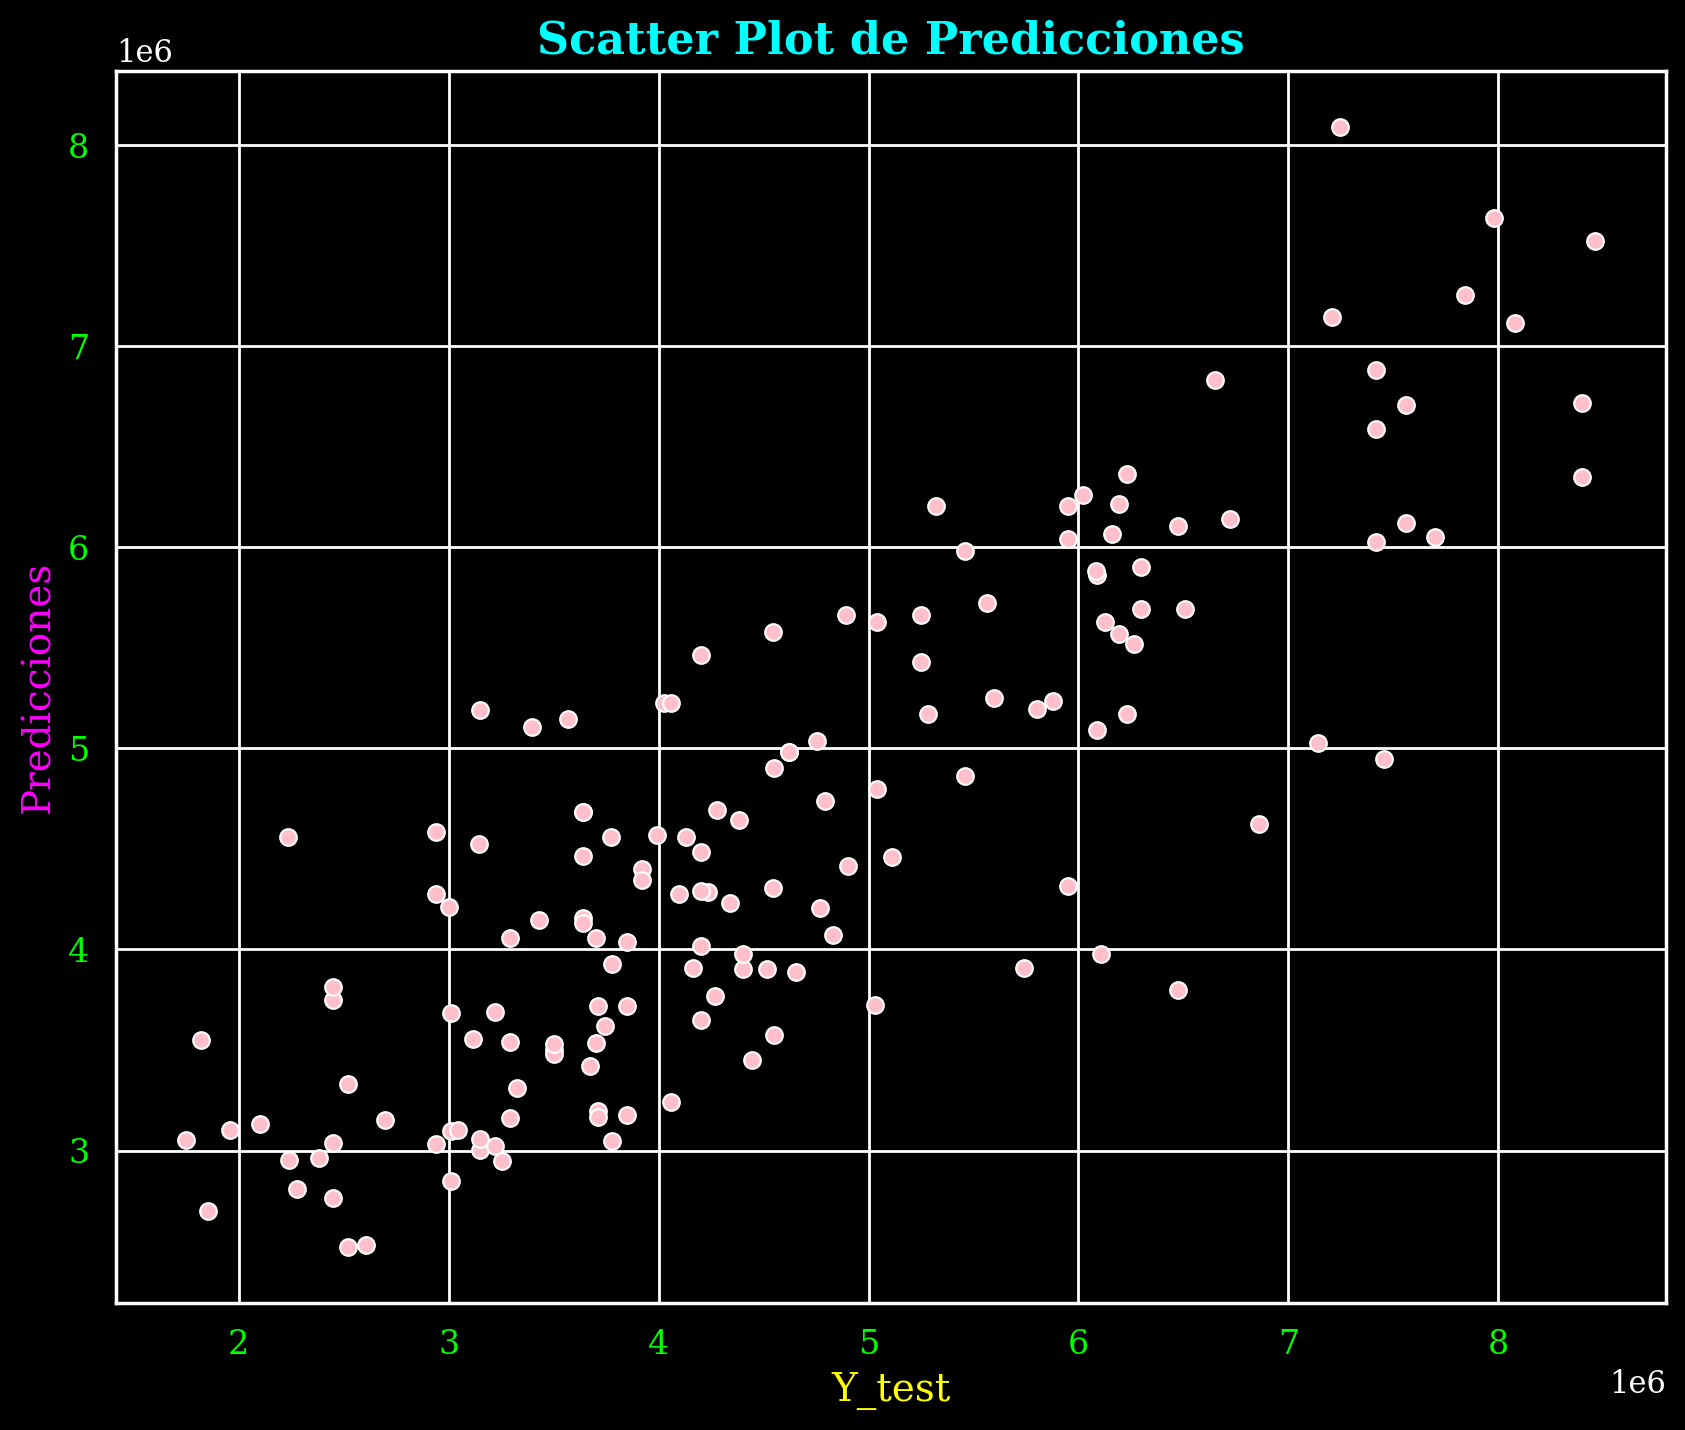

In [ ]:
# Scatter plot de las predicciones
plt.figure(figsize=(10, 8))
# Tipo de letra para el gráfico
plt.rcParams['font.family'] = 'DejaVu Serif'
# Color de fondo negro
plt.style.use("dark_background")

# Combine Y_test and predicciones into a single DataFrame for scatterplot
# Assuming 'price' is the column name in Y_test and predicciones is a 1D array
scatter_data = pd.DataFrame({'Y_test': Y_test['price'], 'predicciones': predicciones.flatten()})

# Creación del gráfico
sns.scatterplot(x='Y_test', y='predicciones', data=scatter_data, color='pink', alpha=1, edgecolors='w', linewidth=0.75)

# Título del gráfico
plt.title('Scatter Plot de Predicciones', fontsize=16, color='cyan', fontweight='bold')

# Agregamos las etiquetas de los valores del eje X
plt.xticks(fontsize=12, color='lime')
plt.yticks(fontsize=12, color='lime')

# Etiquetas del gráfico
plt.xlabel("Y_test", fontsize=14, color='yellow')
plt.ylabel("Predicciones", fontsize=14, color='fuchsia')

# Mostramos el gráfico
plt.show()


In [ ]:
sns.set_palette(['darkorange'])
# Distribución de los errores
sns.histplot(Y_test - predicciones, kde=True, color='darkorange', bins=30)
sns.kdeplot(Y_test - predicciones, color='darkorange', linewidth=2)

#Ponemos los titulos
plt.title('Distribución de los Errores', fontsize=14)
plt.xlabel('Error (Y_test - Predicciones)', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)

#Mostramos la grafica
plt.show()

In [ ]:
# Métricas
mae  = metrics.mean_absolute_error(Y_test, predicciones)
mse = metrics.mean_squared_error(Y_test, predicciones)
rmse = np.sqrt(mse)

df_errores = pd.DataFrame({
    'Métrica': ['MAE (Mean absolute error)', 'MSE (Mean Square error)', 'RMSE (Root Mean Squere Error)'],
    'Valor': [mae, mse, rmse]
})
df_errores

Métrica         Valor
0      MAE (Mean absolute error)  6.802659e+05
1        MSE (Mean Square error)  7.997095e+11
2  RMSE (Root Mean Squere Error)  8.942648e+05

In [ ]:
# Coeficiente de determinacion R2
r2_total = lrm.score(X, Y)
r2_test = lrm.score(X_test, Y_test)
r2_train = lrm.score(X_train, Y_train)

df_r2 = pd.DataFrame({
    'Conjunto': ['Total (X, Y)', 'Test (X_test, Y_test)', 'Train (X_train, Y_train)'],
    'Coeficiente de Determinación R²': [r2_total, r2_test, r2_train]
})
df_r2

Conjunto  Coeficiente de Determinación R²
0              Total (X, Y)                         0.652693
1     Test (X_test, Y_test)                         0.694289
2  Train (X_train, Y_train)                         0.627932

Podemos observar que la explicación de la arianza si es menor pero tampoco es como que disminuyera muchisimo

In [ ]:
#Coeficientes
X.columns

Index(['area', 'bathrooms', 'stories', 'mainroad', 'basement',
       'hotwaterheating', 'airconditioning', 'parking', 'prefarea'],
      dtype='object')

In [ ]:
lrm.coef_

array([[2.61525410e+02, 7.65871696e+05, 4.38014707e+05, 3.38060975e+05,
        3.62203916e+05, 6.72121035e+05, 8.02523053e+05, 1.46601193e+05,
        6.01939868e+05]])

In [ ]:
#Least square con stastmodels

In [ ]:
X_sm=sm.add_constant(X_train)
X_sm.head()
model = sm.OLS(Y_train, X_sm)
lrm_results=model.fit()

In [ ]:
print(lrm_results.summary())


                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.628
Model:                            OLS   Adj. R-squared:                  0.618
Method:                 Least Squares   F-statistic:                     64.13
Date:                Fri, 11 Apr 2025   Prob (F-statistic):           4.41e-68
Time:                        21:45:28   Log-Likelihood:                -5312.5
No. Observations:                 352   AIC:                         1.065e+04
Df Residuals:                     342   BIC:                         1.068e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            5.659e+05   2.02e+05     

El presente análisis corresponde a un modelo de regresión lineal múltiple (OLS) cuyo objetivo es explicar el precio de las casas (price) a partir de diversas características físicas y estructurales de las propiedades. El modelo fue estimado utilizando un total de 381 observaciones y considera nueve variables independientes: área construida (area), número de baños (bathrooms), número de pisos (stories), cercanía a una carretera principal (mainroad), presencia de sótano (basement), calefacción de agua (hotwaterheating), aire acondicionado (airconditioning), número de espacios de estacionamiento (parking) y preferencia de ubicación (prefarea).

En cuanto a los resultados generales del modelo, se observa un coeficiente de determinación
$R^2$ de 0.961, lo que indica que el 96.1% de la variabilidad observada en el precio de las casas es explicada por las variables incluidas en el modelo. Este resultado sugiere un excelente ajuste del modelo a los datos. Además, el valor ajustado del $R^2$ es de 0.960, lo que confirma que el modelo sigue siendo robusto incluso después de considerar el número de variables independientes. El estadístico F, con un valor de 1027 y un p-valor prácticamente nulo (1.41e-256), indica que el modelo es globalmente significativo, es decir, existe suficiente evidencia estadística para afirmar que al menos una de las variables independientes tiene un efecto sobre el precio.

Respecto a los coeficientes estimados, todas las variables resultaron estadísticamente significativas al 5% de nivel de significancia. El coeficiente asociado a area es de aproximadamente 260.85, lo cual implica que por cada unidad adicional de superficie construida, el precio de la casa se incrementa en promedio en 260.85. Asimismo, se observa que el número de baños tiene un efecto considerable sobre el precio, con un coeficiente estimado de 1,129,000 por baño adicional. El número de pisos incrementa el precio en promedio en 467,600 por cada piso adicional. Otras características relevantes incluyen la cercanía a una carretera principal, la cual aumenta el precio en 397,200; la presencia de sótano, con un efecto de 621,000; la calefacción de agua, con un aumento de 638,500; y el aire acondicionado, cuyo efecto sobre el precio es de 726,700. Finalmente, cada lugar de estacionamiento adicional aumenta el precio en 319,200, y estar ubicado en una zona preferente incrementa el precio en 544,900.

---
#**g) Realizar una revisión profunda de si su modelo cumple con los supuestos de la regresión vistos en clase**👨‍💻
---

Los supuestos del modelo de regresión son



1.   **Relación lineal**

1.   **Normalidad de los residuos**

1.   **Homocedasticidad**

1.   **No multicolinealidad**

2.   **No correlación**





## 1) Relación lineal y 4) No multicolinealidad

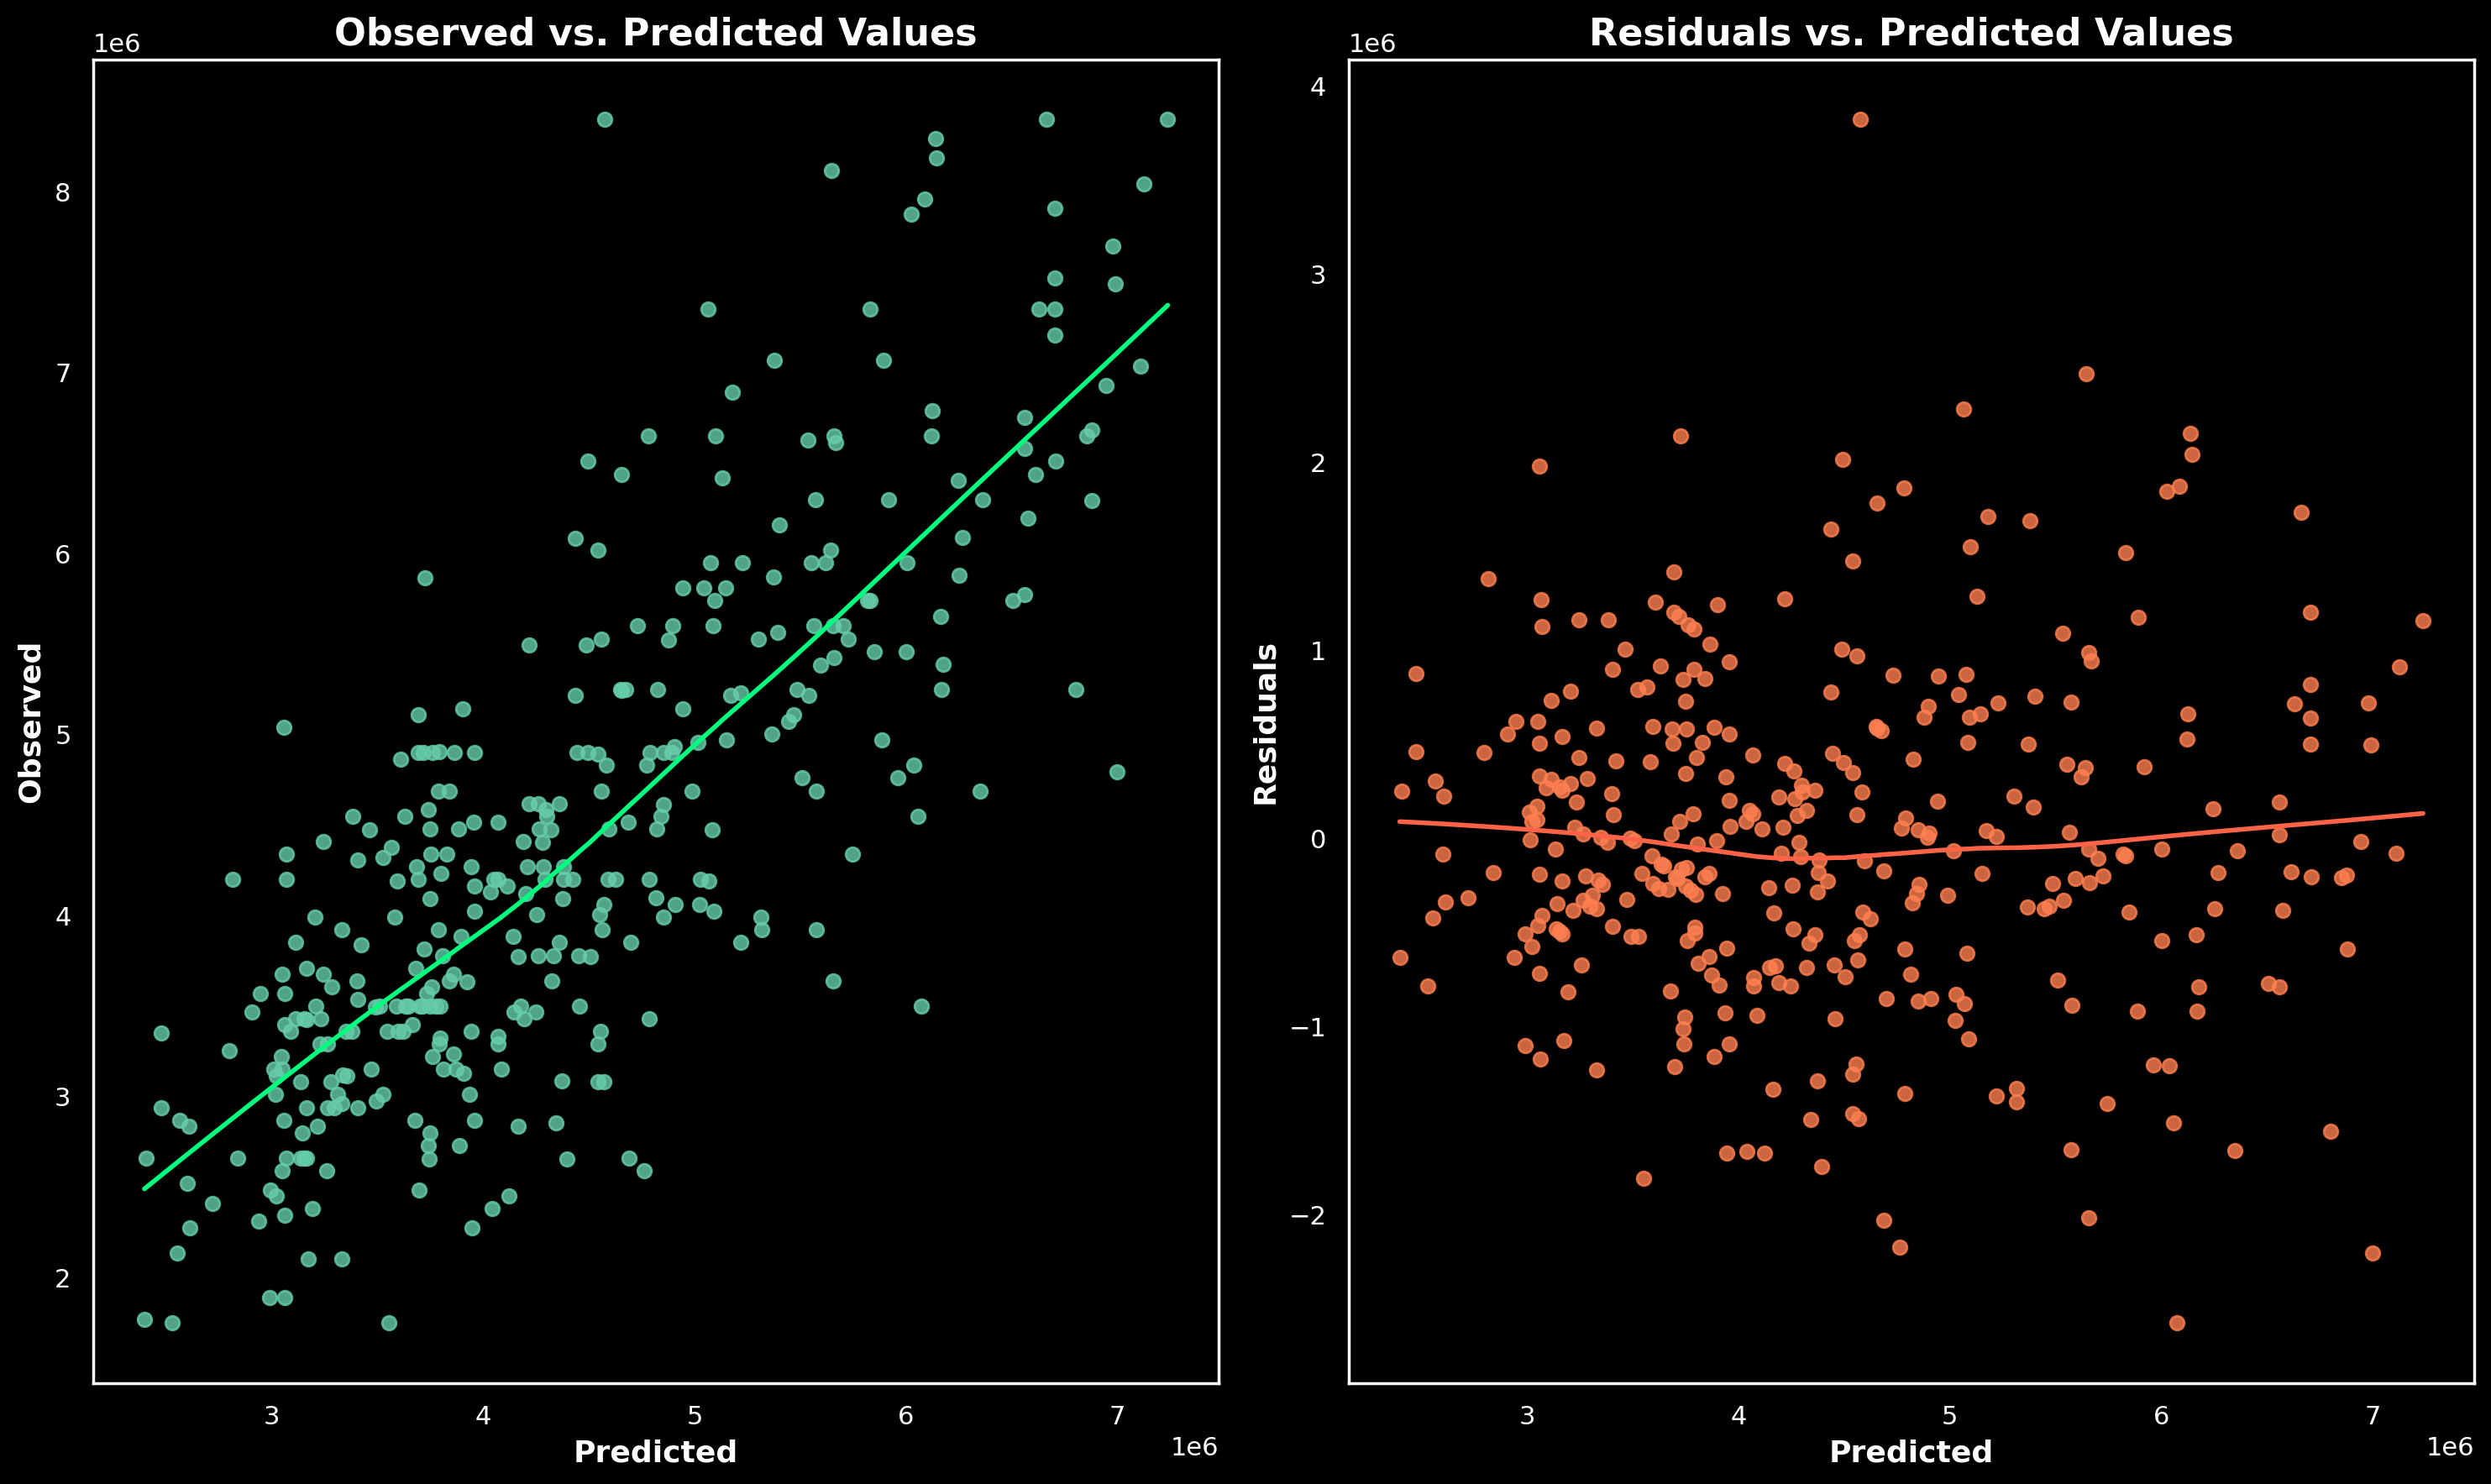

In [ ]:
%matplotlib inline
# Mejoramos la resolución de lass gráficas en pantallas retina.
%config InlineBackend.figure_format ='retina'
#Importamos nuevamente las librerias
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.stats.api as sms

###### Prueba de Linealidad o Multicolinealidad ########
# Configuramos el estilo de las gráficas usando Seaborn
# Estilo oscuro
sns.set_style('dark')
sns.set_context('notebook')
# Personalizamos los colores y el tamaño de la figura con fondo oscuro
plt.rcParams['figure.figsize'] = (15.0, 9.0)
plt.rcParams['axes.facecolor'] = 'black'
plt.rcParams['figure.facecolor'] = 'black'
plt.rcParams['axes.edgecolor'] = 'white'
plt.rcParams['axes.labelcolor'] = 'white'
plt.rcParams['xtick.color'] = 'white'
plt.rcParams['ytick.color'] = 'white'
plt.rcParams['text.color'] = 'white'
plt.rcParams['axes.titlecolor'] = 'white'

# Función personalizada con formato oscuro
def linearity_test(model, y):
    '''
    Function for visually inspecting the assumption of linearity in a linear regression model.
    It plots observed vs. predicted values and residuals vs. predicted values.

    Args:
    * model - fitted OLS model from statsmodels
    * y - observed values
    '''
    fitted_vals = model.predict()
    resids = model.resid
    # Creamos una figura con dos subgráficas usando un fondo negro

    fig, ax = plt.subplots(1, 2, facecolor='black')
    # Primera grafica

    sns.regplot(
        x=fitted_vals, y=y, lowess=True, ax=ax[0],
        scatter_kws={'alpha': 0.8, 'color': '#66CDAA'},
        line_kws={'color': '#00FF7F', 'lw': 2}
    )
    ax[0].set_title('Observed vs. Predicted Values', fontsize=16, fontweight='bold')
    ax[0].set_xlabel('Predicted', fontsize=13, fontweight='bold')
    ax[0].set_ylabel('Observed', fontsize=13, fontweight='bold')
    # Segunda grafica

    sns.regplot(
        x=fitted_vals, y=resids, lowess=True, ax=ax[1],
        scatter_kws={'alpha': 0.8, 'color': '#FF7F50'},
        line_kws={'color': '#FF6347', 'lw': 2}
    )
    ax[1].set_title('Residuals vs. Predicted Values', fontsize=16, fontweight='bold')
    ax[1].set_xlabel('Predicted', fontsize=13, fontweight='bold')
    ax[1].set_ylabel('Residuals', fontsize=13, fontweight='bold')
    # Ajustamos las graficas

    plt.tight_layout()
    plt.show()

# Llamada a la funcion
linearity_test(lrm_results, Y_train)


Analizando las gráficas notamos lo siguiente:



1.   La grafica de la izquierda de los valores predichos y los observados en color verde, si siguen en su mayoría una tendencia lineal donde la mayoría de observaciones se agrupan en la recta $ y=x $ aunque conforma aumenta el valor de $x$ existe puntos más dispersos en la gráfica, esto indica que si existe una relación lineal en el modelo y por tanto si se cumple el primer supuesto
2.   Por otro lado el gráfico de la derecha indica que grafico los valores predichos respecto a los residuales, idealmente deberían distribuirse de manera aleatoria sobre la línea horizontal $y=0$ sin un patrón evidente, en nuestro caso se dibuja una línea con pendiente ligeramente descendente con valores mas dispersos hacia la derecha , pero en general no hay un patrón claro o una curvatura fuerte que indique que no cumple la linealidad o que existe un problema de heterocedasticidad



## 2) Normalidad de los residuos

/usr/local/lib/python3.11/dist-packages/statsmodels/graphics/gofplots.py:1041: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.2980392156862745, 0.4470588235294118, 0.6901960784313725, 1)). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


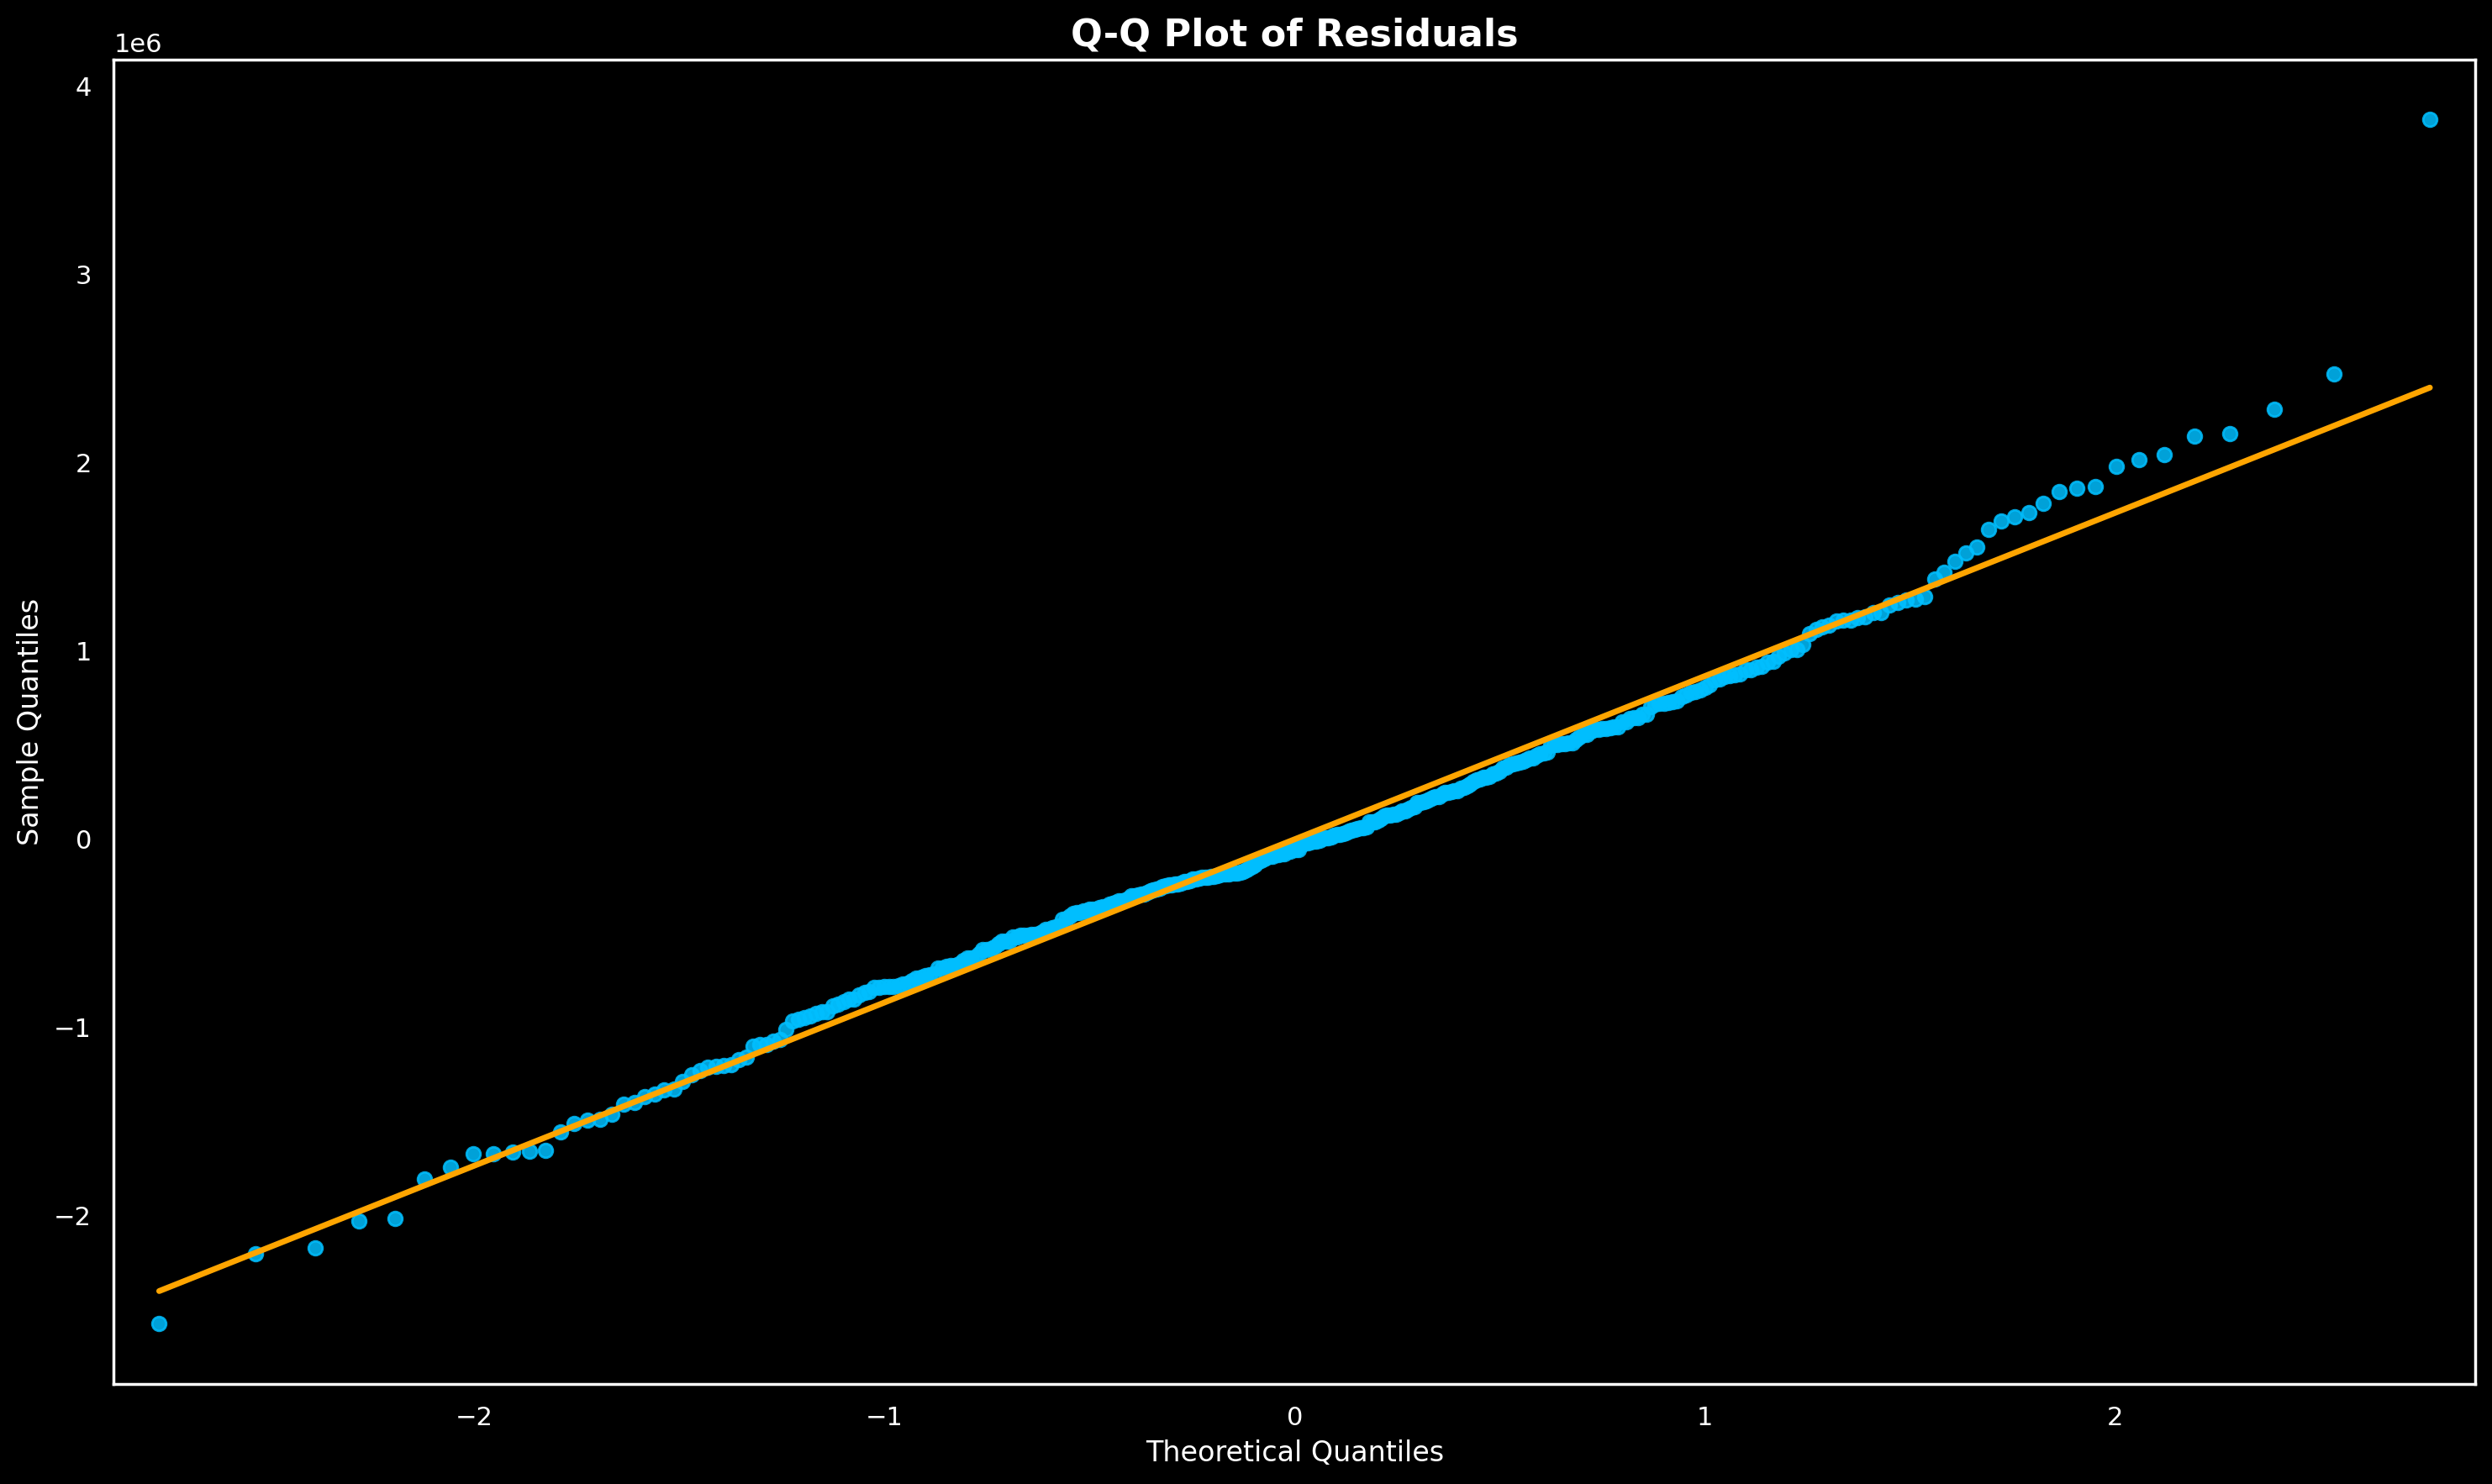

Jarque-Bera test ---- statistic: 21.0371, p-value: 2.7030459502827237e-05
Shapiro-Wilk test ---- statistic: 0.9888, p-value: 0.0085
Kolmogorov-Smirnov test ---- statistic: 0.5256, p-value: 0.0000
Anderson-Darling test ---- statistic: 0.9275, 5% critical value: 0.7780
If the returned AD statistic is larger than the critical value, then for the 5% significance level, the null hypothesis that the data come from the Normal distribution should be rejected. 


In [ ]:
##### Normallity of Residuals #####
#Importamos la libreria
from scipy import stats
#Creamos la funcion
def normality_of_residuals_test(model):
    '''
    Function for drawing the normal QQ-plot of the residuals and running 4 statistical tests to
    investigate the normality of residuals.

    Arg:
    * model - fitted OLS model from statsmodels
    '''
# Establecemos el estilo a un fondo oscuro para las graficas
    plt.style.use('dark_background')
    plt.figure(facecolor='black')

# Creamos una gráficoa Q-Q usando los residuos de nuestro modelo
    qqplot = sm.ProbPlot(model.resid)
# Dibujamos el Q-Q plot
    qqplot.qqplot(
        line='s',
        ax=plt.gca(),
        color='#00BFFF',
        alpha=0.85,
        marker='o',
        markerfacecolor='#00BFFF',
        markeredgecolor='#00BFFF'
    )
# Personalizamos la línea de referencia


    line = plt.gca().get_lines()[1]
    line.set_color('#FFA500')
    line.set_linewidth(2.5)
 # Establecemos el titulo de la grafica
    plt.title('Q-Q Plot of Residuals', fontsize=16, fontweight='bold', color='white')
# Ajustamos las graficas
    plt.tight_layout()
    plt.show()
# Realizamos las 4 pruebas estadísticas


    jb = stats.jarque_bera(model.resid)
    sw = stats.shapiro(model.resid)
    ad = stats.anderson(model.resid, dist='norm')
    ks = stats.kstest(model.resid, 'norm')

    print(f'Jarque-Bera test ---- statistic: {jb[0]:.4f}, p-value: {jb[1]}')
    print(f'Shapiro-Wilk test ---- statistic: {sw[0]:.4f}, p-value: {sw[1]:.4f}')
    print(f'Kolmogorov-Smirnov test ---- statistic: {ks.statistic:.4f}, p-value: {ks.pvalue:.4f}')
    print(f'Anderson-Darling test ---- statistic: {ad.statistic:.4f}, 5% critical value: {ad.critical_values[2]:.4f}')
    print('If the returned AD statistic is larger than the critical value, then for the 5% significance level, the null hypothesis that the data come from the Normal distribution should be rejected. ')



normality_of_residuals_test(lrm_results)


### Interpretación del Q-Q Plot

El gráfico Q-Q evalúa la suposición de normalidad de los residuos del modelo de regresión lineal. En este gráfico, los puntos representan la relación entre los cuantiles teóricos de una distribución normal y los cuantiles observados de los residuos estandarizados.

- **Tendencia Lineal**: La mayoría de los puntos siguen una línea recta, lo cual sugiere que los residuos se distribuyen aproximadamente de forma normal.
- **Desviaciones en los extremos**: Hay ligeras desviaciones en los extremos esto se puede deber a la presencia de outliners o una leve curtosis
- **Conclusión general**: Los residuos se aproximan razonablemente bien a una nuestro normal, salvo peuqeñas desviaciones en los valores extramo de la izquierda y derecha, pero en general se sigue la tendencia lineal por lo que el supuesto se cumple de manera "práctica" pero no perfecta por que Jarque-Bera test da un p-value $ \approx 0 $ que claramente es menor al $5 \% $ por lo tanto debemos rechazar que se distriuye como normalidad en su totalidad


## 3) Homocedasticidad

In [ ]:
#### Prueba de Homocedasticidad
# Configuramos las graficas con un fondo negro
sns.set_style('dark')
sns.set_context('notebook')
plt.rcParams['figure.figsize'] = (15.0, 9.0)
plt.rcParams['axes.facecolor'] = 'black'
plt.rcParams['figure.facecolor'] = 'black'
plt.rcParams['axes.edgecolor'] = 'white'
plt.rcParams['axes.labelcolor'] = 'white'
plt.rcParams['xtick.color'] = 'white'
plt.rcParams['ytick.color'] = 'white'
plt.rcParams['text.color'] = 'white'
plt.rcParams['axes.titlecolor'] = 'white'
#Creamos la funcion

def homoscedasticity_test(model):
    '''
    Function for testing the homoscedasticity of residuals in a linear regression model.
    It plots residuals and standardized residuals vs. fitted values and runs Breusch-Pagan and Goldfeld-Quandt tests.

    Args:
    * model - fitted OLS model from statsmodels
    '''
    fitted_vals = model.predict()
    resids = model.resid
    resids_standardized = model.get_influence().resid_studentized_internal
# Creamos una grafica con dos subgraficas
    fig, ax = plt.subplots(1, 2, facecolor='black')
# Creamos la primera grafica

    sns.regplot(
        x=fitted_vals, y=resids, lowess=True, ax=ax[0],
        scatter_kws={'color': '#00FFFF', 'alpha': 0.9},
        line_kws={'color': '#1E90FF', 'lw': 2}
    )
    ax[0].set_title('Residuals vs Fitted', fontsize=16, fontweight='bold')
    ax[0].set_xlabel('Fitted Values', fontsize=12)
    ax[0].set_ylabel('Residuals', fontsize=12)
    ax[0].grid(False)

# Creamos la segunda grafica
    sns.regplot(
        x=fitted_vals, y=np.sqrt(np.abs(resids_standardized)), lowess=True, ax=ax[1],
        scatter_kws={'color': '#DA70D6', 'alpha': 0.9},
        line_kws={'color': '#8E44AD', 'lw': 2}
    )
    ax[1].set_title('Scale-Location', fontsize=16, fontweight='bold')
    ax[1].set_xlabel('Fitted Values', fontsize=12)
    ax[1].set_ylabel('sqrt(abs(Residuals))', fontsize=12)
    ax[1].grid(False)
#Ajustamos las graficas
    plt.tight_layout()
    plt.show()
# Hacemos la prueba estadística de Breusch-Pagan


    bp_test = pd.DataFrame(sms.het_breuschpagan(resids, lrm_results.model.exog),
                           columns=['value'],
                           index=['Lagrange multiplier statistic', 'p-value', 'f-value', 'f p-value'])
# Hacemos la prueba estadística de Goldfeld-Quandt

    gq_test = pd.DataFrame(sms.het_goldfeldquandt(resids, lrm_results.model.exog)[:-1],
                           columns=['value'],
                           index=['F statistic', 'p-value'])
#Mostramos los resultados

    print('\n Breusch-Pagan test ----')
    print(bp_test)
    print('\n Goldfeld-Quandt test ----')
    print(gq_test)
    print('\n Residuals plots ----')

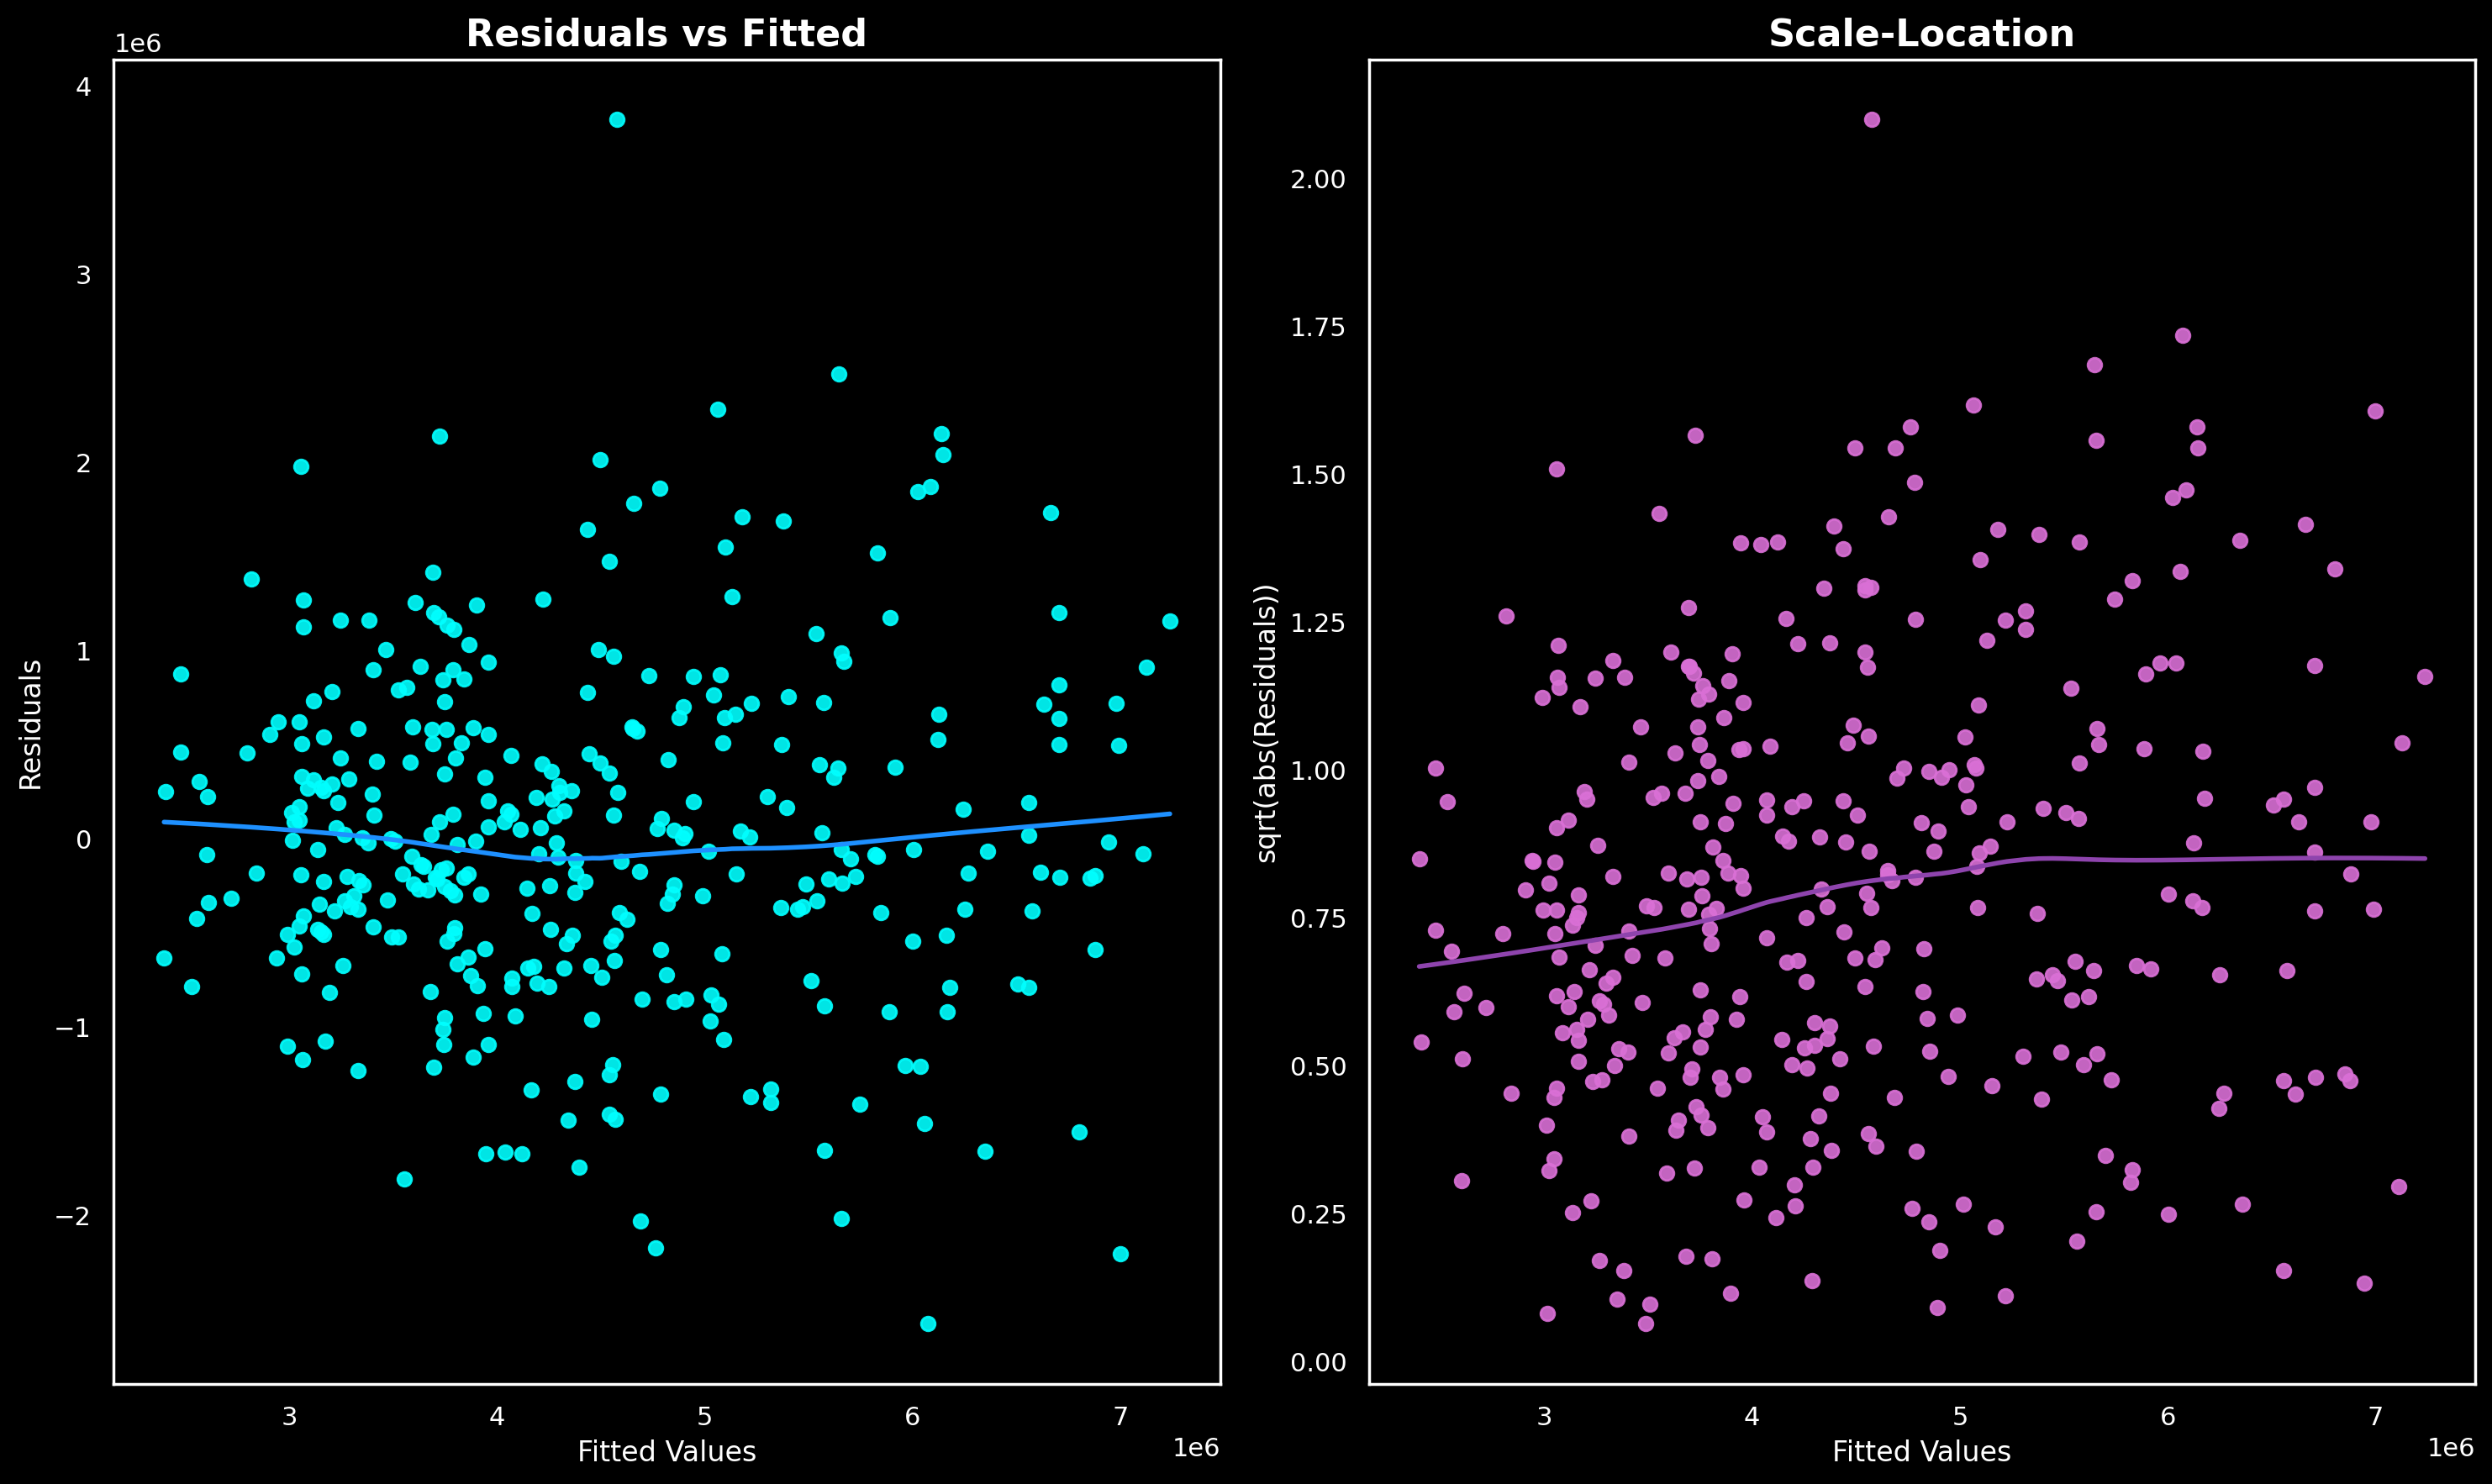


 Breusch-Pagan test ----
                                   value
Lagrange multiplier statistic  24.162343
p-value                         0.004052
f-value                         2.800682
f p-value                       0.003489

 Goldfeld-Quandt test ----
                value
F statistic  0.772552
p-value      0.951302

 Residuals plots ----


In [ ]:
homoscedasticity_test(lrm_results)

###Evaluación visual de la homocedasticidad

Los siguientes gráficos permiten examinar si los residuos del modelo presentan **homocedasticidad**, una suposición clave en la regresión lineal:

#### 1. Residuos vs Ajustados
- 🔹 Se observa una **mayor dispersión de residuos** conforme aumentan los valores ajustados, especialmente hacia la derecha del gráfico.
- ⚠️ Esto sugiere la **presencia de heterocedasticidad**, ya que la variabilidad de los residuos **no es constante** a lo largo del rango de predicción.
- 🔄 El patrón curvo de la línea azul también indica que podría haber una relación no lineal no capturada por el modelo.

#### 2. Scale-Location Plot
- 🔹 Este gráfico evalúa también la homocedasticidad, pero con la raíz cuadrada del valor absoluto de los residuos.
- ⚠️ Se aprecia un **patrón ascendente en la línea de tendencia**, lo cual también **refuerza la evidencia de heterocedasticidad**: los residuos crecen en magnitud a medida que aumentan los valores ajustados.

Ambos gráficos proporcionan **evidencia de heterocedasticidad** en el modelo, lo que podría invalidar algunos supuestos clásicos como la eficiencia de los estimadores OLS.

Esto lo podemos confirmar con la prueba de Breusch-Pagan pues tiene p-value significativamente más pequeños a $ 5\% $ lo que indica que el modelo presenta heterocedasticidad



## 5) No correlación

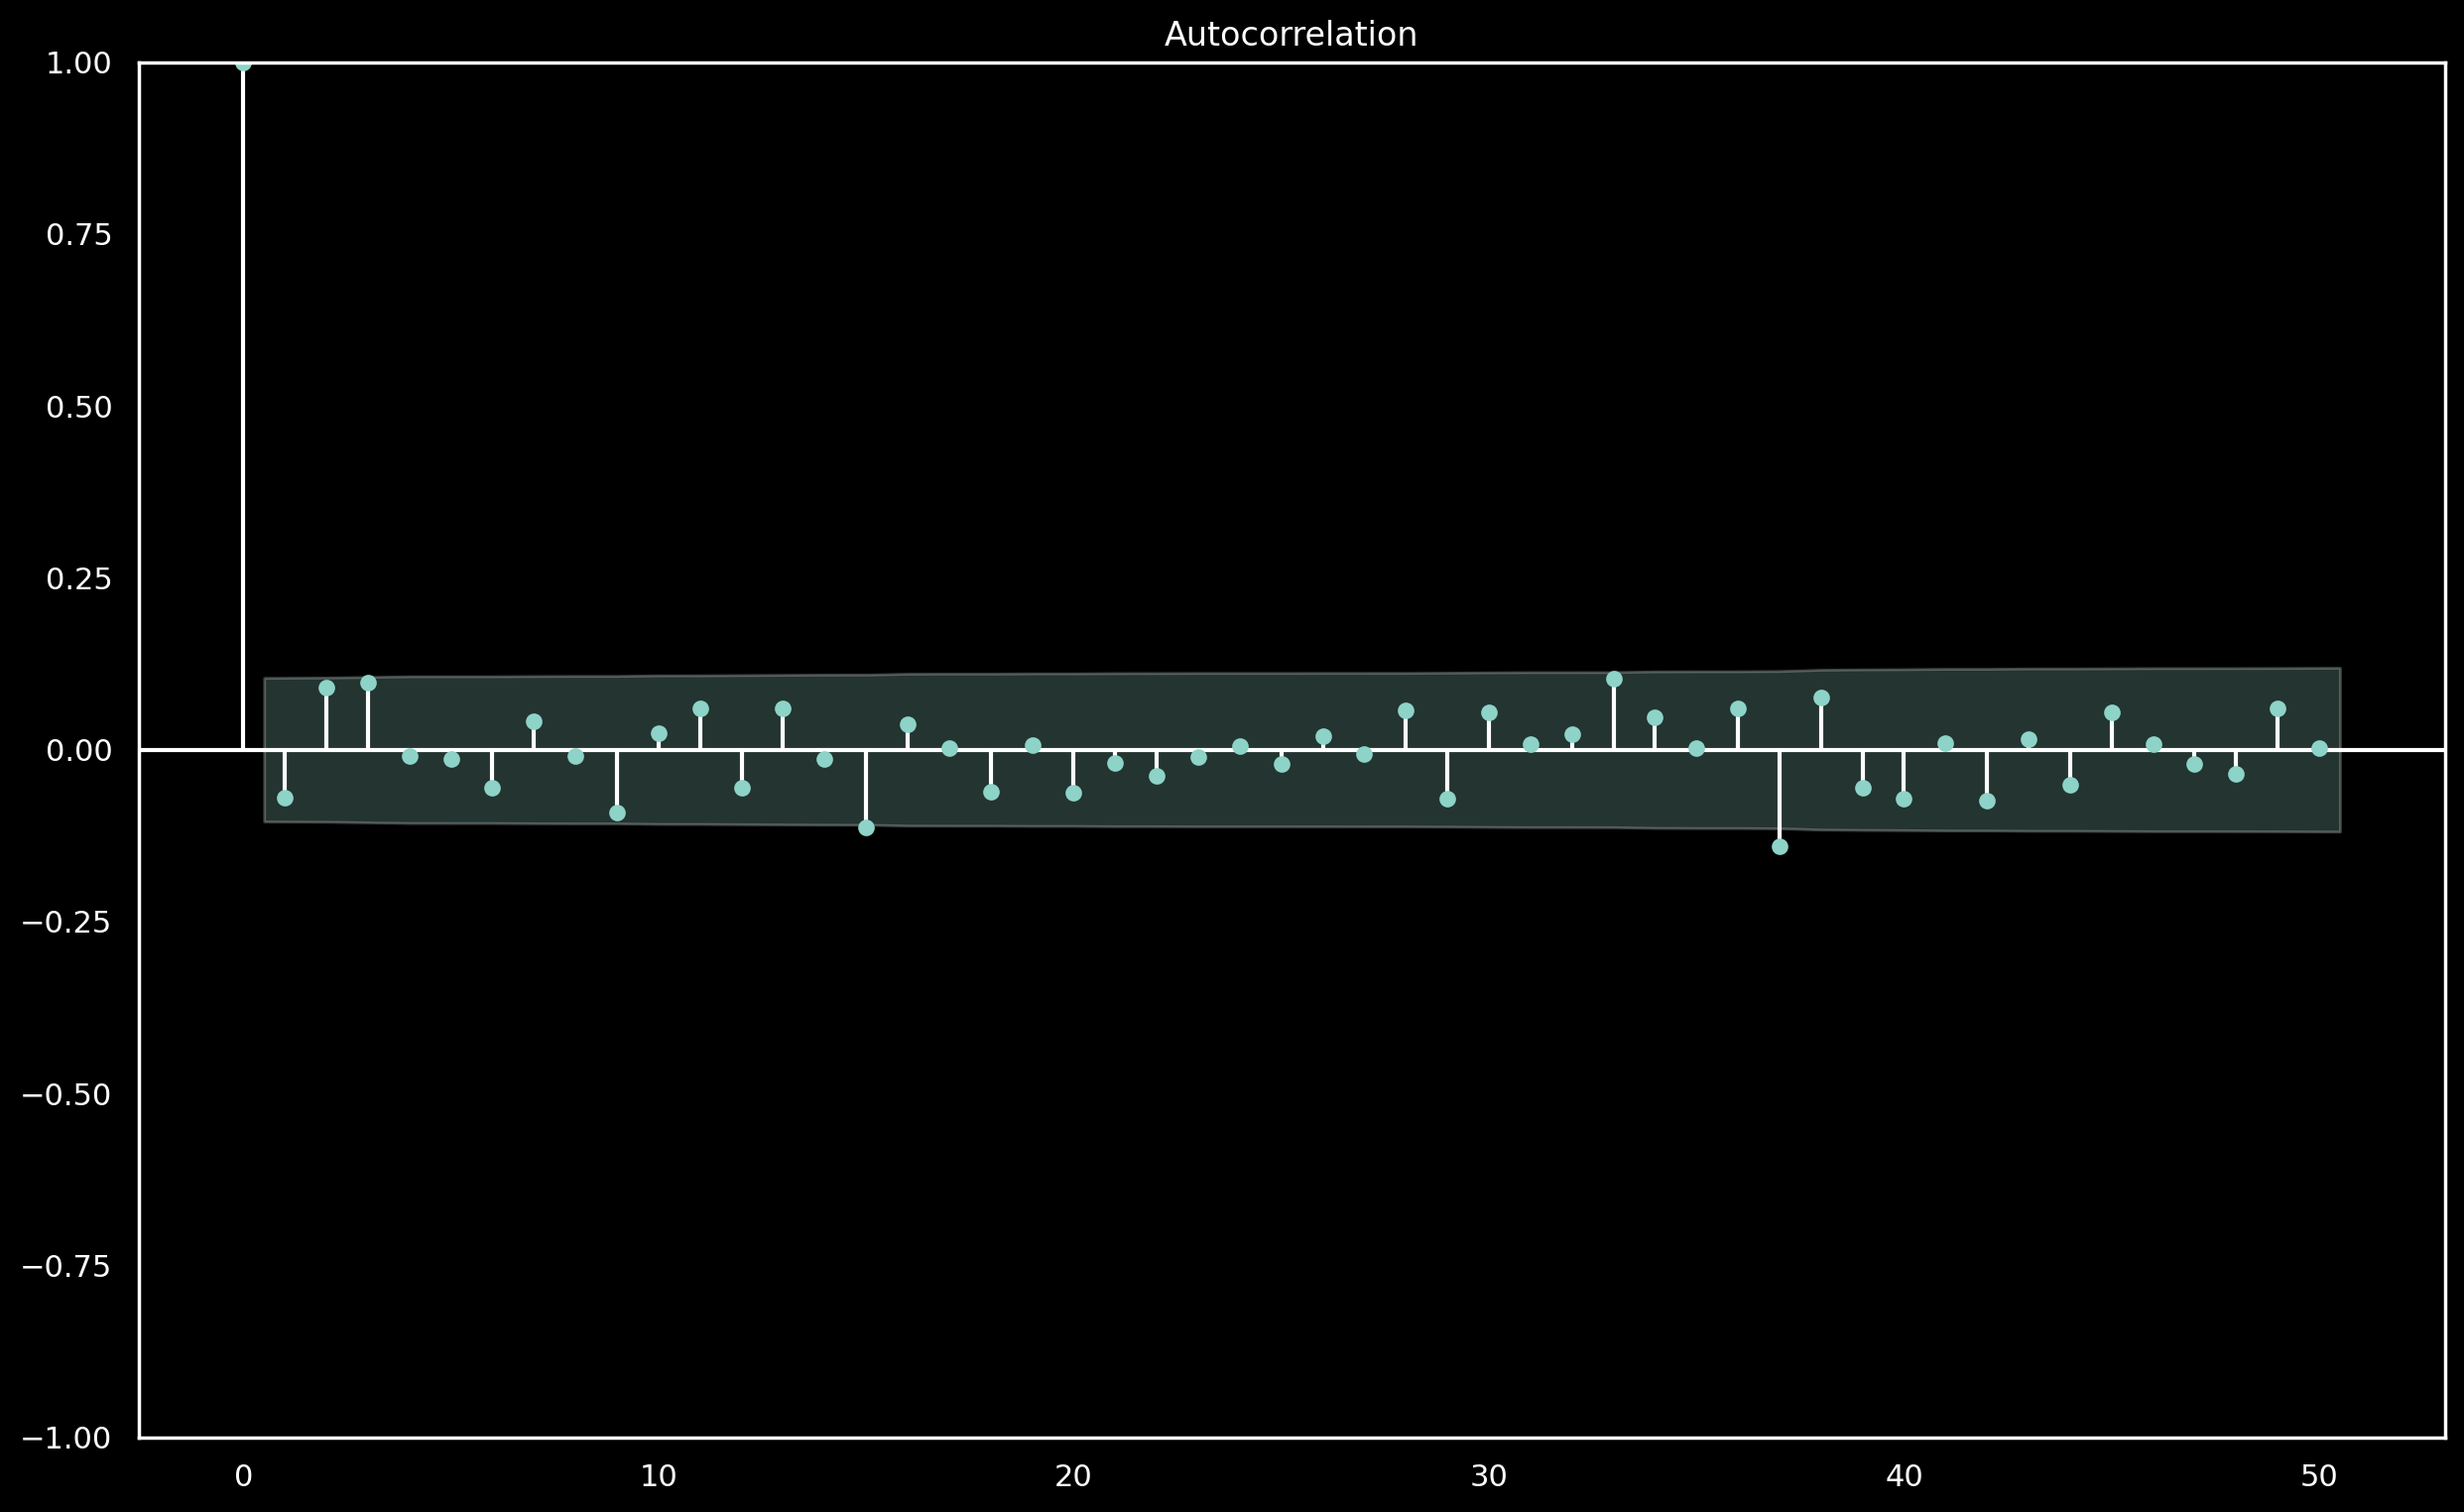

In [ ]:
# Test to find no autocorrelation residuals
import statsmodels.tsa.api as smt
#Generamos la grafica  de autocorrelación
acf = smt.graphics.plot_acf(lrm_results.resid, lags=50 , alpha=0.05)
#Mostramos la grafica
acf.show()

In [ ]:
#Importamos la métrica durbin_watson
from statsmodels.stats.stattools import durbin_watson
#Calculamos la métrica Durbin-Watson
dw = durbin_watson(lrm_results.resid)
#Imprimimos la métrica Durbin-Watson
print("Durbin-Watson:", dw)

Durbin-Watson: 2.137920055049007


Como el valor de Durbin-Watson es de $2.1363$ podemos decir que se sumple es supuesto ya que $\approx 2$ indica que no existe correlación en cambio si $\approx 0$ existe fuerte correlacion positiva y si $\approx 4$ indica una fuerte correlación negativa

In [ ]:
#### Goodness of Fit #####
#### Probar que una distribución empírica tenga relación con una teórica
# Generamos una secuencia de 101 numeros entre 0 y 1 para la x
x = np.linspace(0, 1, 101)
np.random.seed(123)
# Generamos a y como una función lineal de x
y = x + np.random.normal(0, 0.1, 101)

#Ponemos un estilo oscuro para la grafica
plt.style.use('dark_background')
plt.figure(figsize=(10, 6))
plt.rcParams['axes.facecolor'] = 'black'

# generamos la grafica de scatter plot
plt.scatter(x, y, color='#ff9e80', alpha=0.85)
plt.xlabel("x", fontsize=12, color='white')
plt.ylabel("y", fontsize=12, color='white')


beta1, beta0 = np.polyfit(x, y, 1)

print("-----------")
print(f'beta0: {beta0}')
print("-----------")
print(f'beta1: {beta1}')
print("-----------")


plt.plot([0, 1], [beta0, beta0 + beta1], "w-", lw=2)

# Dibujamos las flechas dobles en la grafica para ilustrar distancias verticales
plt.annotate("", xy=(0.2, min(y)), xytext=(0.2, max(y)),
             arrowprops=dict(arrowstyle="<->", lw=2, color='white'))
plt.annotate("", xy=(0.5, 0.3), xytext=(0.5, 0.7),
             arrowprops=dict(arrowstyle="<->", linestyle="--", lw=2, color='white'))

# Cambiamos el color de los bordes
plt.gca().spines['top'].set_color('white')
plt.gca().spines['right'].set_color('white')
plt.gca().spines['left'].set_color('white')
plt.gca().spines['bottom'].set_color('white')


plt.gca().tick_params(axis='both', colors='white')


plt.grid(False)

#Ajustamos la grafica
plt.tight_layout()
#Mostramos la grafica
plt.show()

-----------
beta0: 0.00015314269180743007
-----------
beta1: 1.006333243405114
-----------


Es resumen los supuestos


1.   **Relación lineal** Se cumple

1.   **Normalidad de los residuos** No se cumple

1.   **Homocedasticidad** No se cumple

1.   **No multicolinealidad** Se cumple

2.   **No correlación** Se cumple

---
#**h) Generar algunas Hipótesis del porque el set de datos pudiera requerir de un tratamiento posterior para cumplir con los supuestos de la regresión**🕵️
---

Los supuestos del modelo de regresión son



1.   **Relación lineal** Ocurre cuando no existe una relacion lineal entre la variable predictora $ (y) $ y las variables explicativas $ (x) $ por eso se hizo uso de la función linearity_test y se comprobo que existirea una linea recta entre las variables , si no esto no ocurre deben usarse modelos de regresión polinomial

1.   **Normalidad de los residuos** Se debe eliminar outiliners y valores nulos por que sesgan el modelo y llevan a conclusiones incorrectas e imprecisas, de lo contrario se suelen observar una desviación notable de los puntos en las colas (tanto en la parte inferior izquierda como en la parte superior derecha), lo que sugiere que los residuos presentan **desviaciones de la normalidad** en los extremos y no cumplen por completo el supuesto de normalidad

1.   **Homocedasticidad** Para eliminar este problema podemos eliminar valores generalmente atípicos y nulos que pueden generar el problema de heterocedasticidad, otra opción es transformar los datos con logaritmos o raíz cuadrada para reducir el impacto de los outliners , si esto no funciona podemos usar modelos robustos para ajustar los errores

1.   **No multicolinealidad**: Para tratar este tipo de errores se hace uso de la matriz de correlaciones y se eliminan las variables altamente correlacionadas entre si, para obtener coeficientes más precisos, Otra opción tambien es realizar PCA (Análisis de componentes principales) especialmente si se cuentan con muchas variables

2.   **No autocorrelación** Puede ocurirr cuando se comete un error inicial en el modelo por omisión de variables relevantes, por eso es importante despues de realizar el modelo inicial, realizar nuevamente omitiendo variables no significativas o agregando variables significativas que por error no se hayan considerado en el modelo

---
# **Conclusiones**: 📌
---

A pesar de los buenos resultados obtenidos, es importante señalar un posible problema de multicolinealidad dentro del modelo. El valor del número de condición (Condition Number) es de aproximadamente 25,700, lo cual supera ampliamente el umbral sugerido de 30 a partir del cual se considera que existe riesgo de multicolinealidad. Este fenómeno ocurre cuando algunas variables independientes están altamente correlacionadas entre sí, lo que puede afectar la precisión de las estimaciones y la interpretación de los coeficientes.

Nuestro rendimiento del modelo mejorado se puede observar con el coeficiente de determinación $R^2=0.96$ significa que el 96% de la variabilidad de la variable dependiente, es decir el precio de las casas es explicada por el modelo, lo que podemos considerar como un buen ajuste del modelo.

Finalmente podemos concluir de manera general que el análisis de regresión es una herramienta estadística extremadamente útil y poderosa, sirve para  predecir el valor de una variable en el futuro (precios de casas) además de explicar la relación de esta variable dependiente ($y$) en función de otras variables independientes ($x_i$) y notar que tanto efecto tiene una variable ($x_i$) al momento de predecir ($y$), en este caso podemos notar como el precio de una casa puede ser predecido mediante las variables más significativas area, baños, pisos, acceso a carreteras principales, calefacción , aire acondicionado, estacionamientos y áreas preferentes